# Importing Necessary Libraries

In [240]:
import os
from pathlib import Path, PurePath

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [241]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [242]:
# df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

# Data Peeking, organizing, replacing, preprocessing ....

In [243]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [245]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [246]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [247]:
len_of_df = df.shape
len_of_df

(7043, 21)

In [248]:
features = list(df.columns)

In [249]:
data = []

for feature in features:
    data.append({
        "column_name": feature,
        'unique_value_count': len(np.unique(df[feature])),
        'total_count': len(df),
        'unique_values': np.unique(df[feature]),
        'Datatype': df[feature].dtype
    })

data

[{'column_name': 'customerID',
  'unique_value_count': 7043,
  'total_count': 7043,
  'unique_values': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
         '9993-LHIEB', '9995-HOTOH'], dtype=object),
  'Datatype': dtype('O')},
 {'column_name': 'gender',
  'unique_value_count': 2,
  'total_count': 7043,
  'unique_values': array(['Female', 'Male'], dtype=object),
  'Datatype': dtype('O')},
 {'column_name': 'SeniorCitizen',
  'unique_value_count': 2,
  'total_count': 7043,
  'unique_values': array([0, 1], dtype=int64),
  'Datatype': dtype('int64')},
 {'column_name': 'Partner',
  'unique_value_count': 2,
  'total_count': 7043,
  'unique_values': array(['No', 'Yes'], dtype=object),
  'Datatype': dtype('O')},
 {'column_name': 'Dependents',
  'unique_value_count': 2,
  'total_count': 7043,
  'unique_values': array(['No', 'Yes'], dtype=object),
  'Datatype': dtype('O')},
 {'column_name': 'tenure',
  'unique_value_count': 73,
  'total_count': 7043,
  'unique_values': arr

In [250]:
def change_dtype(x):
    if x == ' ':
        x = 0
    else:
        x = float(x)
    return x

In [251]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:change_dtype(x))

In [252]:
df['TotalCharges'].dtype

dtype('float64')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Viz

In [254]:
col = list(df.columns)
col.remove('customerID')
col.remove('tenure')
col.remove('MonthlyCharges')
col.remove('TotalCharges')
col.remove('Churn')

In [255]:
n_rows, n_cols = 8, 2
specs=[
    [{'type':'pie'}, {'type':'pie'}],
    [{'type':'pie'}, {'type':'pie'}],
    [{'type':'pie'}, {'type':'pie'}],
    [{'type':'pie'}, {'type':'pie'}],
    [{'type':'pie'}, {'type':'pie'}],
    [{'type':'pie'}, {'type':'pie'}],
    [{'type':'pie'}, {'type':'pie'}],
    [{'type':'pie'}, {'type':'pie'}],
]

labels, values, titles = [], [], []
for column in col:
    label = list((df[column].value_counts()).index)
    value = df[column].value_counts()
    title = f"{column} Distribution"
    labels.append(label)
    values.append(value)
    titles.append(title)
 

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=titles, specs=specs)

for i in range(1, n_rows + 1):  # Rows
    for j in range(1, n_cols + 1):  # Columns
        idx = (i - 1) * 2 + j - 1
        label = labels[idx]
        value = values[idx]
        fig.add_trace(
            go.Pie(labels=label, values=value, hole=0.3, name=f'Pie {idx + 1}'),
            row=i,
            col=j
        )

fig.update_layout(
    title=dict(text="<b>Distribution Charts</b>", x=0.5, xanchor='center'),
    showlegend=True,
    height=3200,
    width=1600
)

fig.update_traces(hole=.2, hoverinfo="label+percent+name", textfont_size=16)

fig.show()


In [286]:
labels = list((df['Churn'].value_counts()).index)
values = df['Churn'].value_counts()
# Create subplots: use 'domain' type for Pie subplot
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
title = f"<b>Churn Distribution</b>"

fig.update_layout(
    title=dict(text=title, x=0.5, xanchor='center'),
    showlegend=True,
)
fig.update_traces(hole=.2, hoverinfo="all", textfont_size=16)
fig.show()

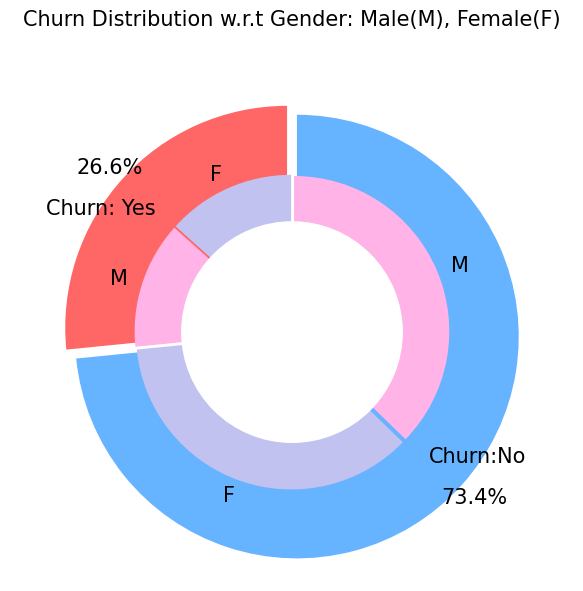

In [257]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes", "Churn:No"]
values = [1869, 5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939, 930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [287]:
def plot_hist(column):    
    fig = px.histogram(df, x="Churn", color=column, title=f"<b>{column} distribution w.r.t. Churn</b>")
    fig.update_layout(width=700, height=500, bargap=0.1)
    fig.update_traces(hoverinfo="all", textfont_size=16)
    fig.show()

In [295]:
fig = px.histogram(df, x="Churn", color='gender', title=f"<b>Gender distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)

# fig.show()
fig.data

(Histogram({
     'alignmentgroup': 'True',
     'bingroup': 'x',
     'hovertemplate': 'gender=Female<br>Churn=%{x}<br>count=%{y}<extra></extra>',
     'legendgroup': 'Female',
     'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
     'name': 'Female',
     'offsetgroup': 'Female',
     'orientation': 'v',
     'showlegend': True,
     'x': array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object),
     'xaxis': 'x',
     'yaxis': 'y'
 }),
 Histogram({
     'alignmentgroup': 'True',
     'bingroup': 'x',
     'hovertemplate': 'gender=Male<br>Churn=%{x}<br>count=%{y}<extra></extra>',
     'legendgroup': 'Male',
     'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
     'name': 'Male',
     'offsetgroup': 'Male',
     'orientation': 'v',
     'showlegend': True,
     'x': array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'No'], dtype=object),
     'xaxis': 'x',
     'yaxis': 'y'
 }))

In [288]:
for i in col:
    plot_hist(i)

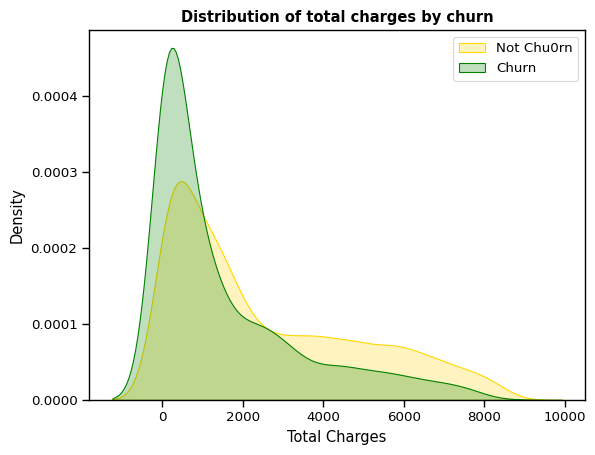

In [260]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True)
ax.legend(["Not Chu0rn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn', weight='bold')
plt.show()

Customers whose Total charges are below 2000 might have a chance of churning.

In [261]:
df['MonthlyCharges'].value_counts().index.max()

118.75

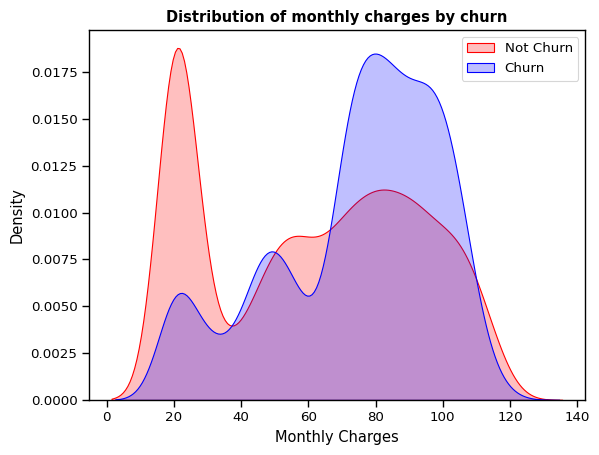

In [262]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn', weight='bold')
plt.show()

Customers whose monthly charges are higher are churning away (more than 60)

In [263]:
fig = px.box(df, x='Churn', y = 'tenure')


fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)

fig.update_xaxes(title_text='Churn', row=1, col=1)

fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

Customers with less tenure are Churning away (New Customers)

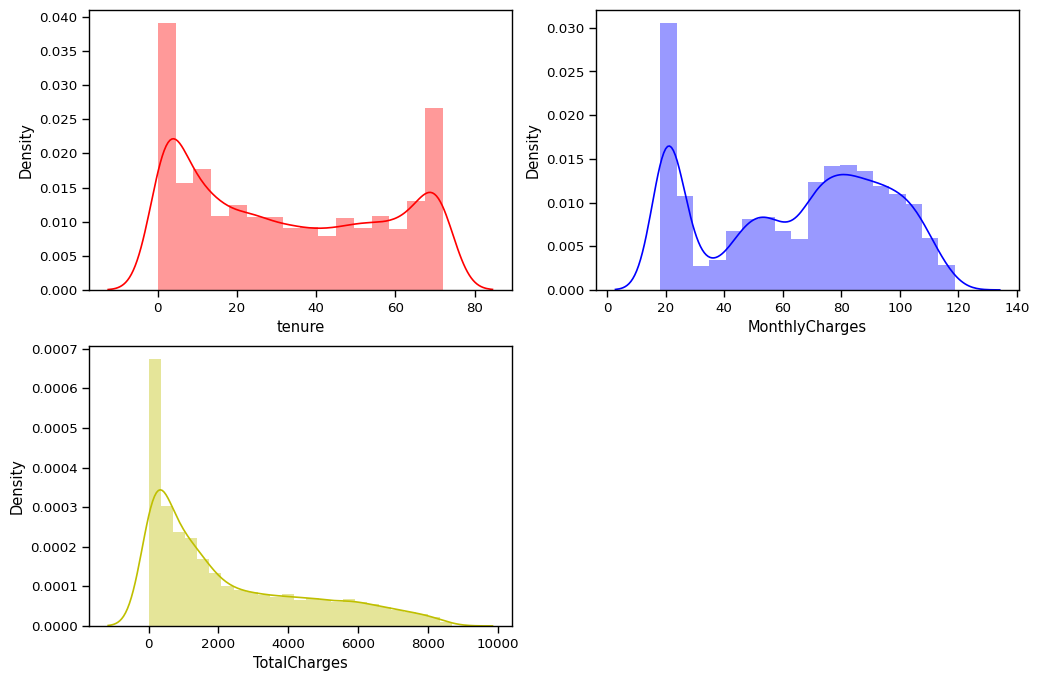

In [264]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.distplot(df['tenure'], color='r')
plt.subplot(2, 2, 2)
sns.distplot(df['MonthlyCharges'], color='b')
plt.subplot(2, 2, 3)
sns.distplot(df['TotalCharges'], color='y')
plt.show()


In [305]:
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

seniority_churn

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476

In [307]:
(seniority_churn.T*100.0 / seniority_churn.T.sum())

SeniorCitizen          0          1
Churn                              
No             76.393832  58.318739
Yes            23.606168  41.681261

In [306]:
(seniority_churn.T*100.0 / seniority_churn.T.sum()).T

Churn                 No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261

In [313]:
def churn_per_w_r_t_cols(column):
    churn_w_r_t_col = df.groupby([column, 'Churn']).size().unstack()
    churn = (churn_w_r_t_col.T * 100.0 / churn_w_r_t_col.T.sum()).T
    return churn

In [319]:
g = churn_per_w_r_t_cols('gender')
g

Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338

In [325]:
g.No.Female

73.07912844036697

In [318]:
for i in col:
    print(i)
    print(churn_per_w_r_t_cols(i))
    print("-" * 20)

gender
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338
--------------------
SeniorCitizen
Churn                 No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261
--------------------
Partner
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903
--------------------
Dependents
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237
--------------------
PhoneService
Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637
--------------------
MultipleLines
Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71

In [345]:
def plot_w_r_t_churn(col, title):
    colors = ['#4D3425','#E4512B']
    ax = col.plot(
        kind='bar',
        width = 0.2,
        stacked = True,
        rot = 0, 
        figsize = (8,6),
        color = colors)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    ax.legend(loc='center',prop={'size':14},title = 'Churn')
    ax.set_ylabel('% Customers')
    ax.set_title(f'Churn by {title} Level',size = 14)

    # Code to add the data labels on the stacked bar chart
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                    color = 'white', size=8)

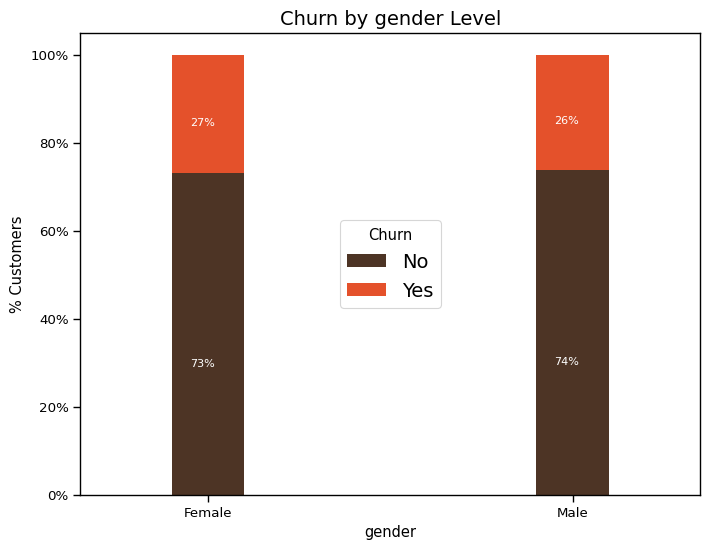

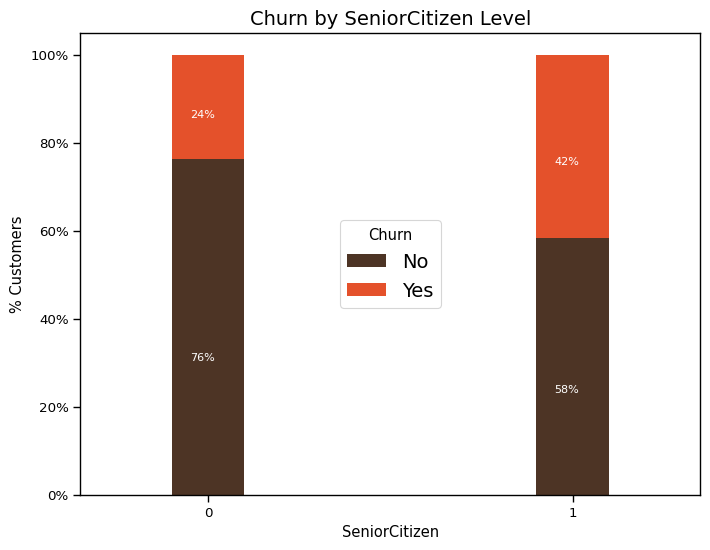

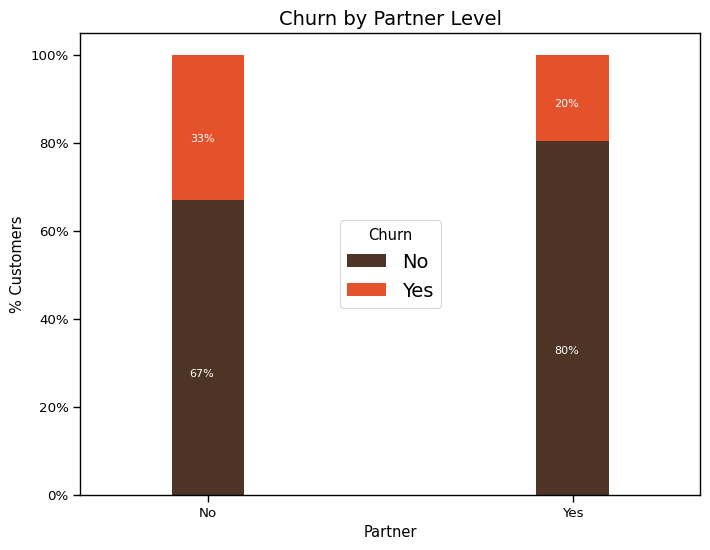

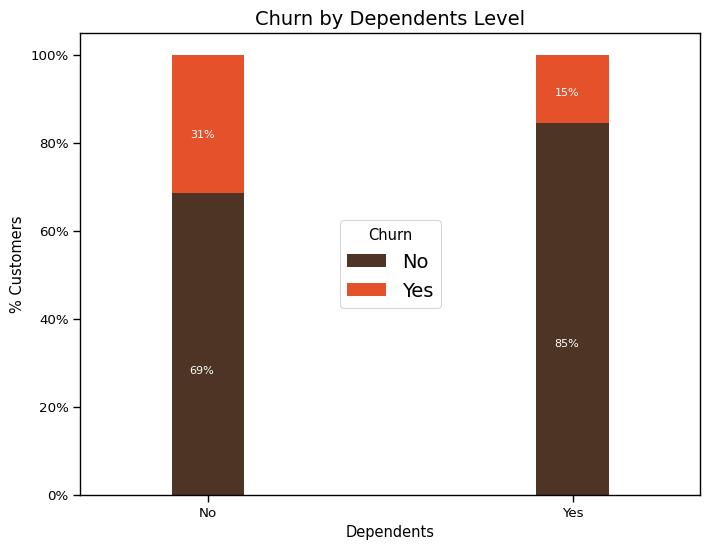

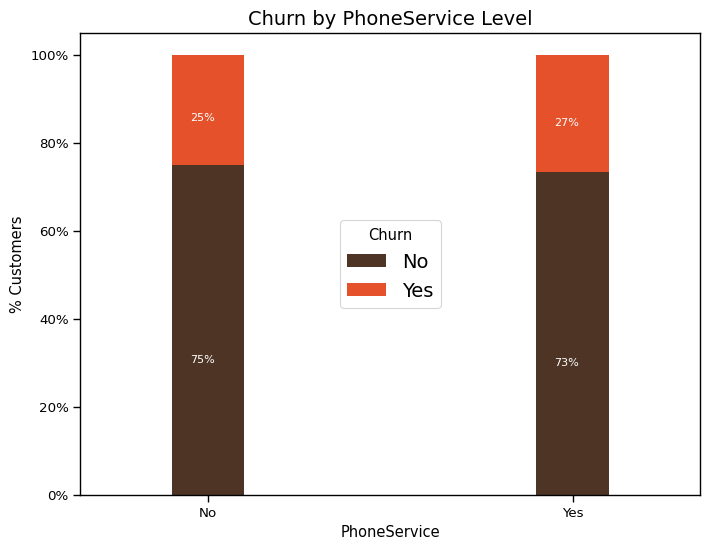

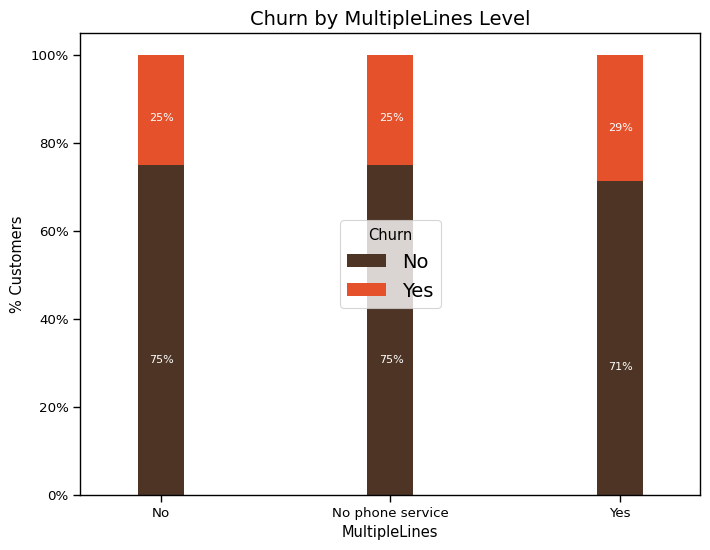

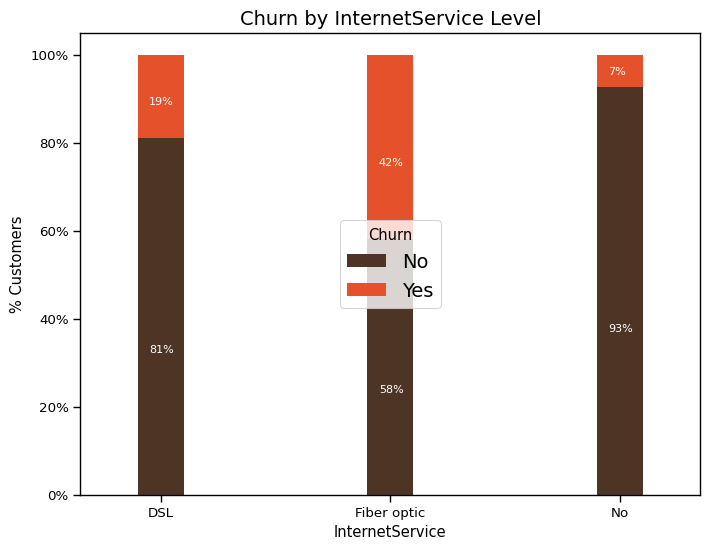

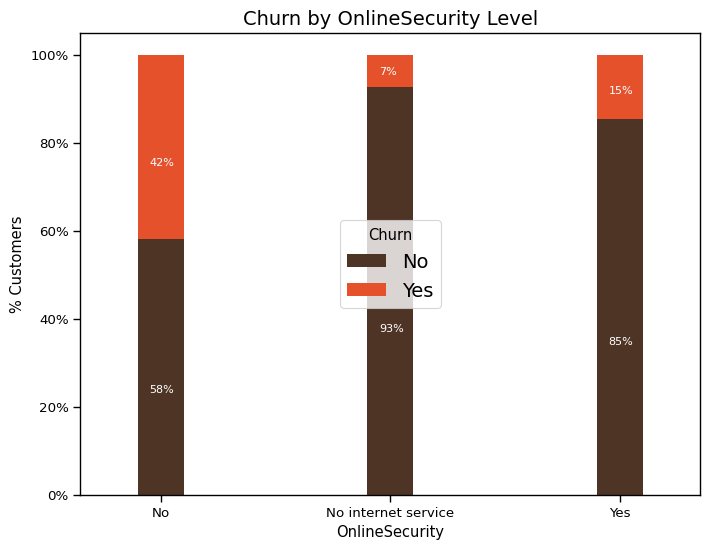

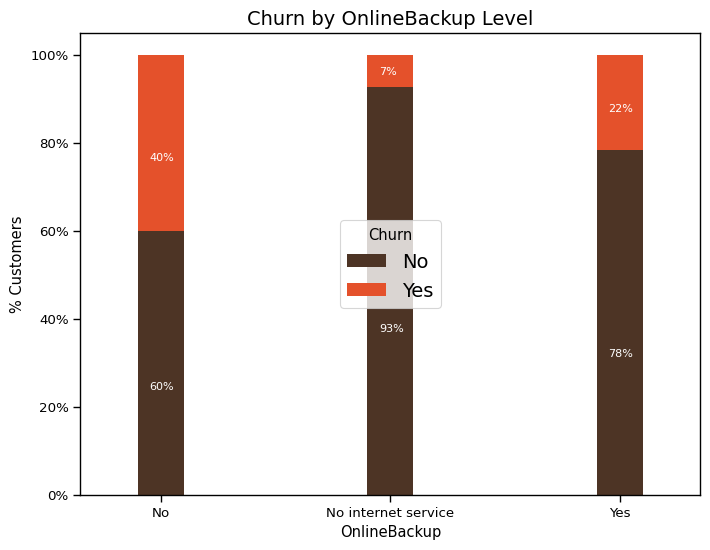

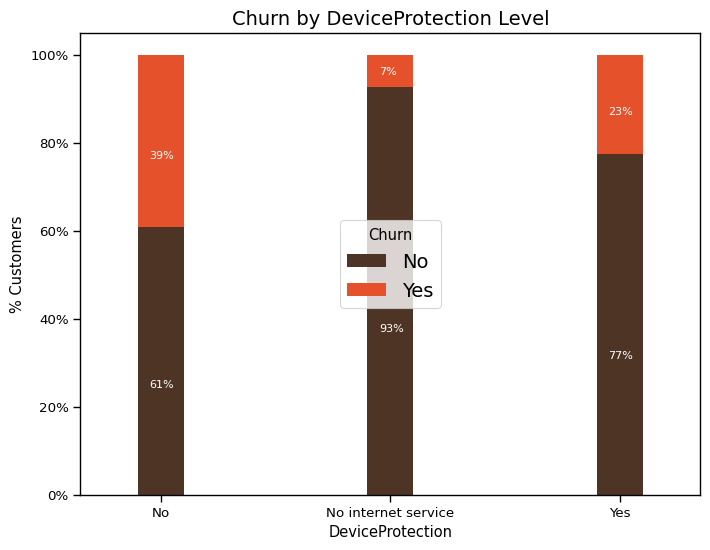

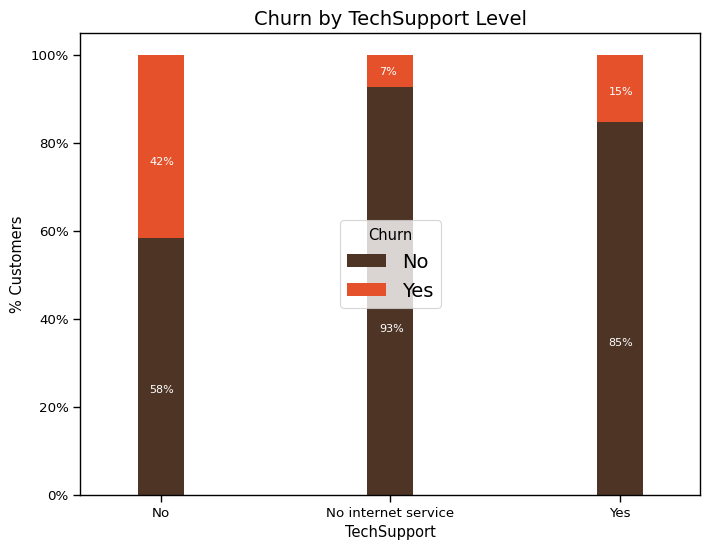

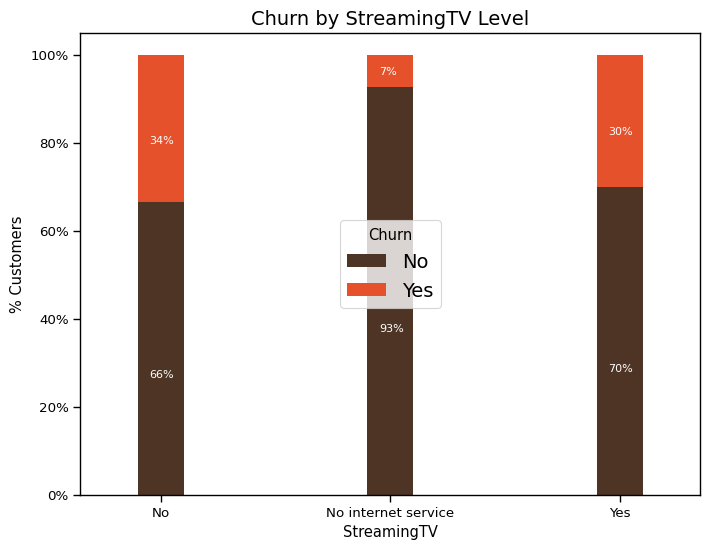

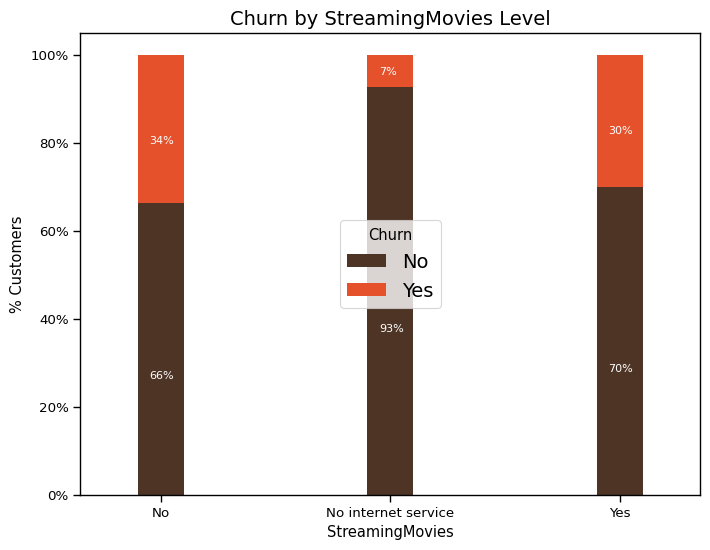

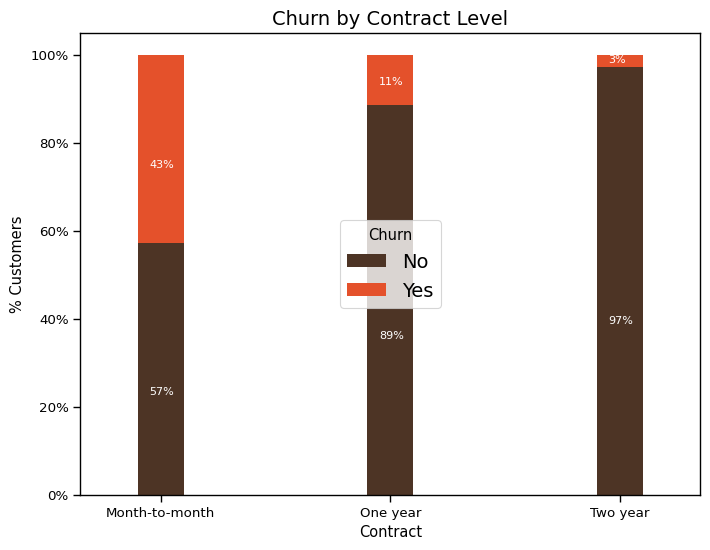

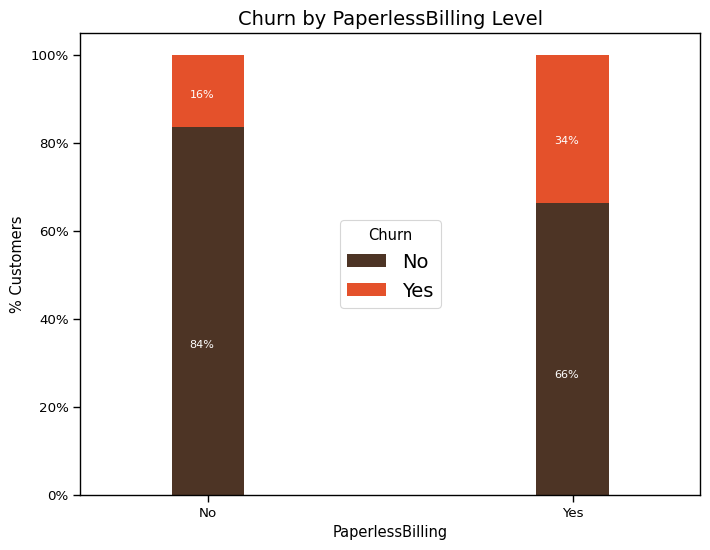

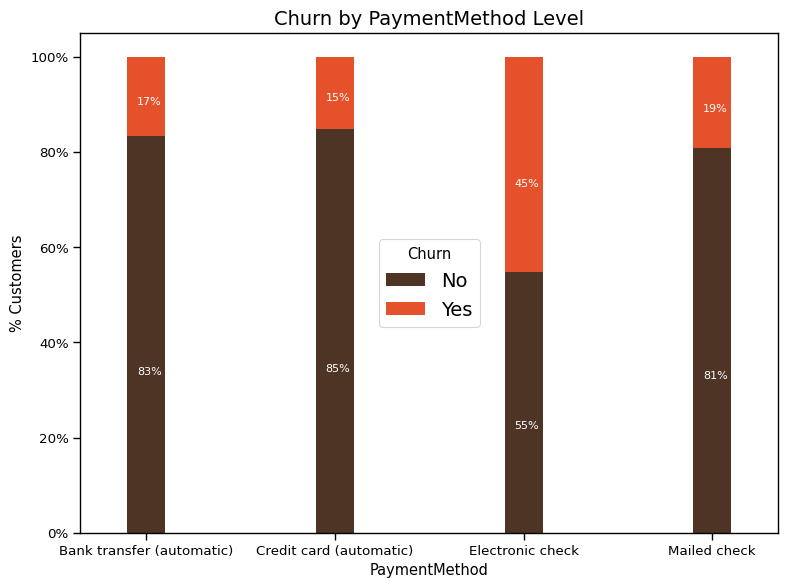

In [346]:
n_rows = 8
n_cols = 2
# plt.figure(figsize=(12, 30))
for i, j in enumerate(col):
    # plt.subplot(n_rows, n_cols, i + 1)
    plot_w_r_t_churn(churn_per_w_r_t_cols(j), j)

plt.tight_layout()
    

In [347]:
cols = list(df.columns)
cols.remove("customerID")
cols.remove("Churn")

In [348]:
y = df[["customerID", "Churn"]]
y.shape

(7043, 2)

In [349]:
x = df[cols]
x.shape

(7043, 19)

In [350]:
x1 = pd.get_dummies(x)

In [351]:
y['Churn'] = y['Churn'].map({'Yes': 1, 'No': 0})

In [352]:
df1 = pd.concat([x1, y.Churn], axis=1)
df1.shape

(7043, 46)

<Axes: >

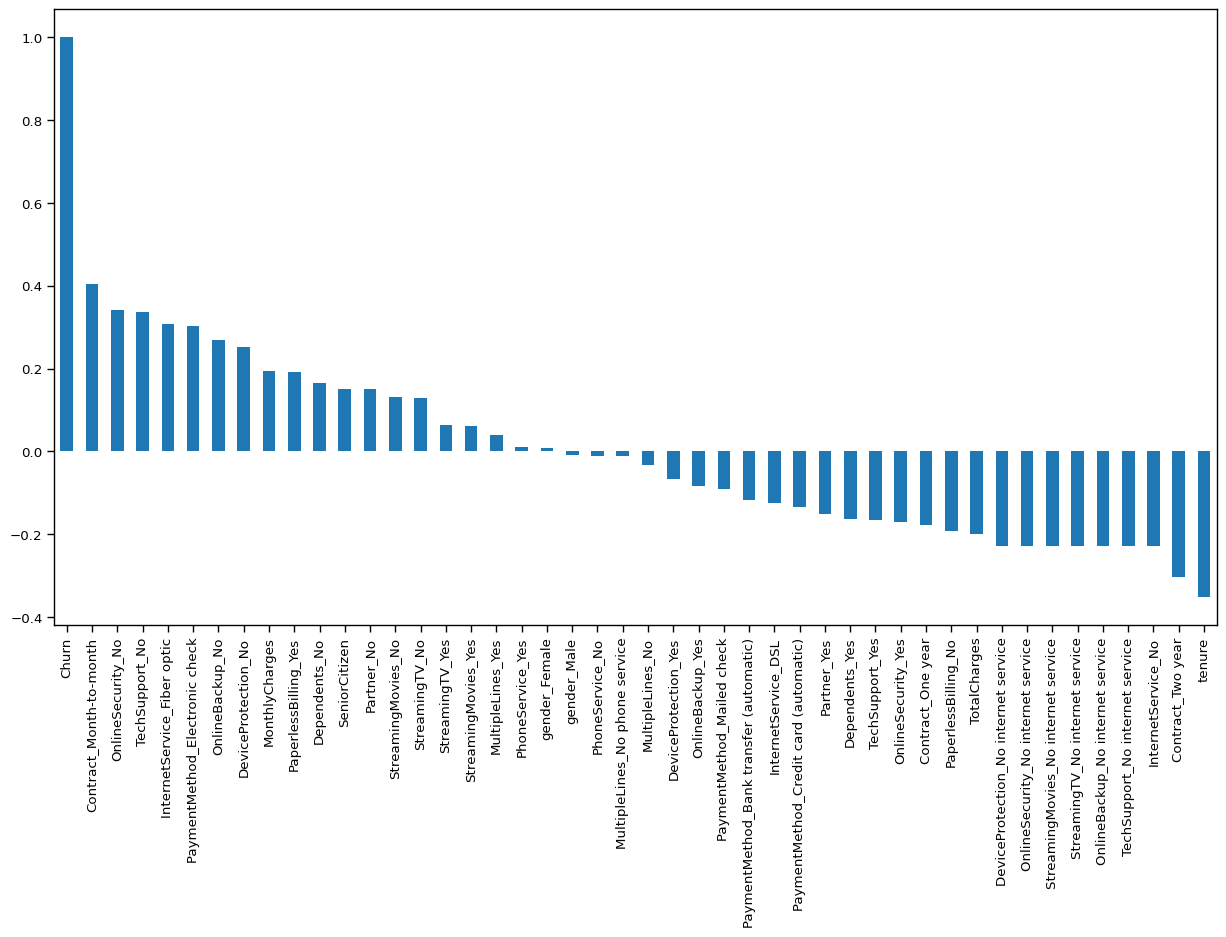

In [272]:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [273]:
df1.corr()

SeniorCitizen    tenure  \
SeniorCitizen                                 1.000000  0.016567   
tenure                                        0.016567  1.000000   
MonthlyCharges                                0.220173  0.247900   
TotalCharges                                  0.103006  0.826178   
gender_Female                                 0.001874 -0.005106   
gender_Male                                  -0.001874  0.005106   
Partner_No                                   -0.016479 -0.379697   
Partner_Yes                                   0.016479  0.379697   
Dependents_No                                 0.211185 -0.159712   
Dependents_Yes                               -0.211185  0.159712   
PhoneService_No                              -0.008576 -0.008448   
PhoneService_Yes                              0.008576  0.008448   
MultipleLines_No                             -0.136213 -0.323088   
MultipleLines_No phone service               -0.008576 -0.008448   
MultipleLines_Yes                             0.142948  0.331941   
InternetService_DSL                          -0.108322  0.013274   
InternetService_Fiber optic                   0.255338  0.019720   
InternetService_No                           -0.182742 -0.039062   
OnlineSecurity_No                             0.185532 -0.263746   
OnlineSecurity_No internet service           -0.182742 -0.039062   
OnlineSecurity_Yes                           -0.038653  0.327203   
OnlineBackup_No                               0.087952 -0.312694   
OnlineBackup_No internet service             -0.182742 -0.039062   
OnlineBackup_Yes                              0.066572  0.360277   
DeviceProtection_No                           0.094810 -0.312740   
DeviceProtection_No internet service         -0.182742 -0.039062   
DeviceProtection_Yes                          0.059428  0.360653   
TechSupport_No                                0.205620 -0.262143   
TechSupport_No internet service              -0.182742 -0.039062   
TechSupport_Yes                              -0.060625  0.324221   
StreamingTV_No                                0.049062 -0.245039   
StreamingTV_No internet service              -0.182742 -0.039062   
StreamingTV_Yes                               0.105378  0.279756   
StreamingMovies_No                            0.034210 -0.252220   
StreamingMovies_No internet service          -0.182742 -0.039062   
StreamingMovies_Yes                           0.120176  0.286111   
Contract_Month-to-month                       0.138360 -0.645561   
Contract_One year                            -0.046262  0.202570   
Contract_Two year                            -0.117000  0.558533   
PaperlessBilling_No                          -0.156530 -0.006152   
PaperlessBilling_Yes                          0.156530  0.006152   
PaymentMethod_Bank transfer (automatic)      -0.016159  0.243510   
PaymentMethod_Credit card (automatic)        -0.024135  0.233006   
PaymentMethod_Electronic check                0.171718 -0.208363   
PaymentMethod_Mailed check                   -0.153477 -0.233852   
Churn                                         0.150889 -0.352229   

                                         MonthlyCharges  TotalCharges  \
SeniorCitizen                                  0.220173      0.103006   
tenure                                         0.247900      0.826178   
MonthlyCharges                                 1.000000      0.651174   
TotalCharges                                   0.651174      1.000000   
gender_Female                                  0.014569      0.000080   
gender_Male                                   -0.014569     -0.000080   
Partner_No                                    -0.096848     -0.317504   
Partner_Yes                                    0.096848      0.317504   
Dependents_No                                  0.113890     -0.062078   
Dependents_Yes                                -0.113890      0.062078   
PhoneService_No                          

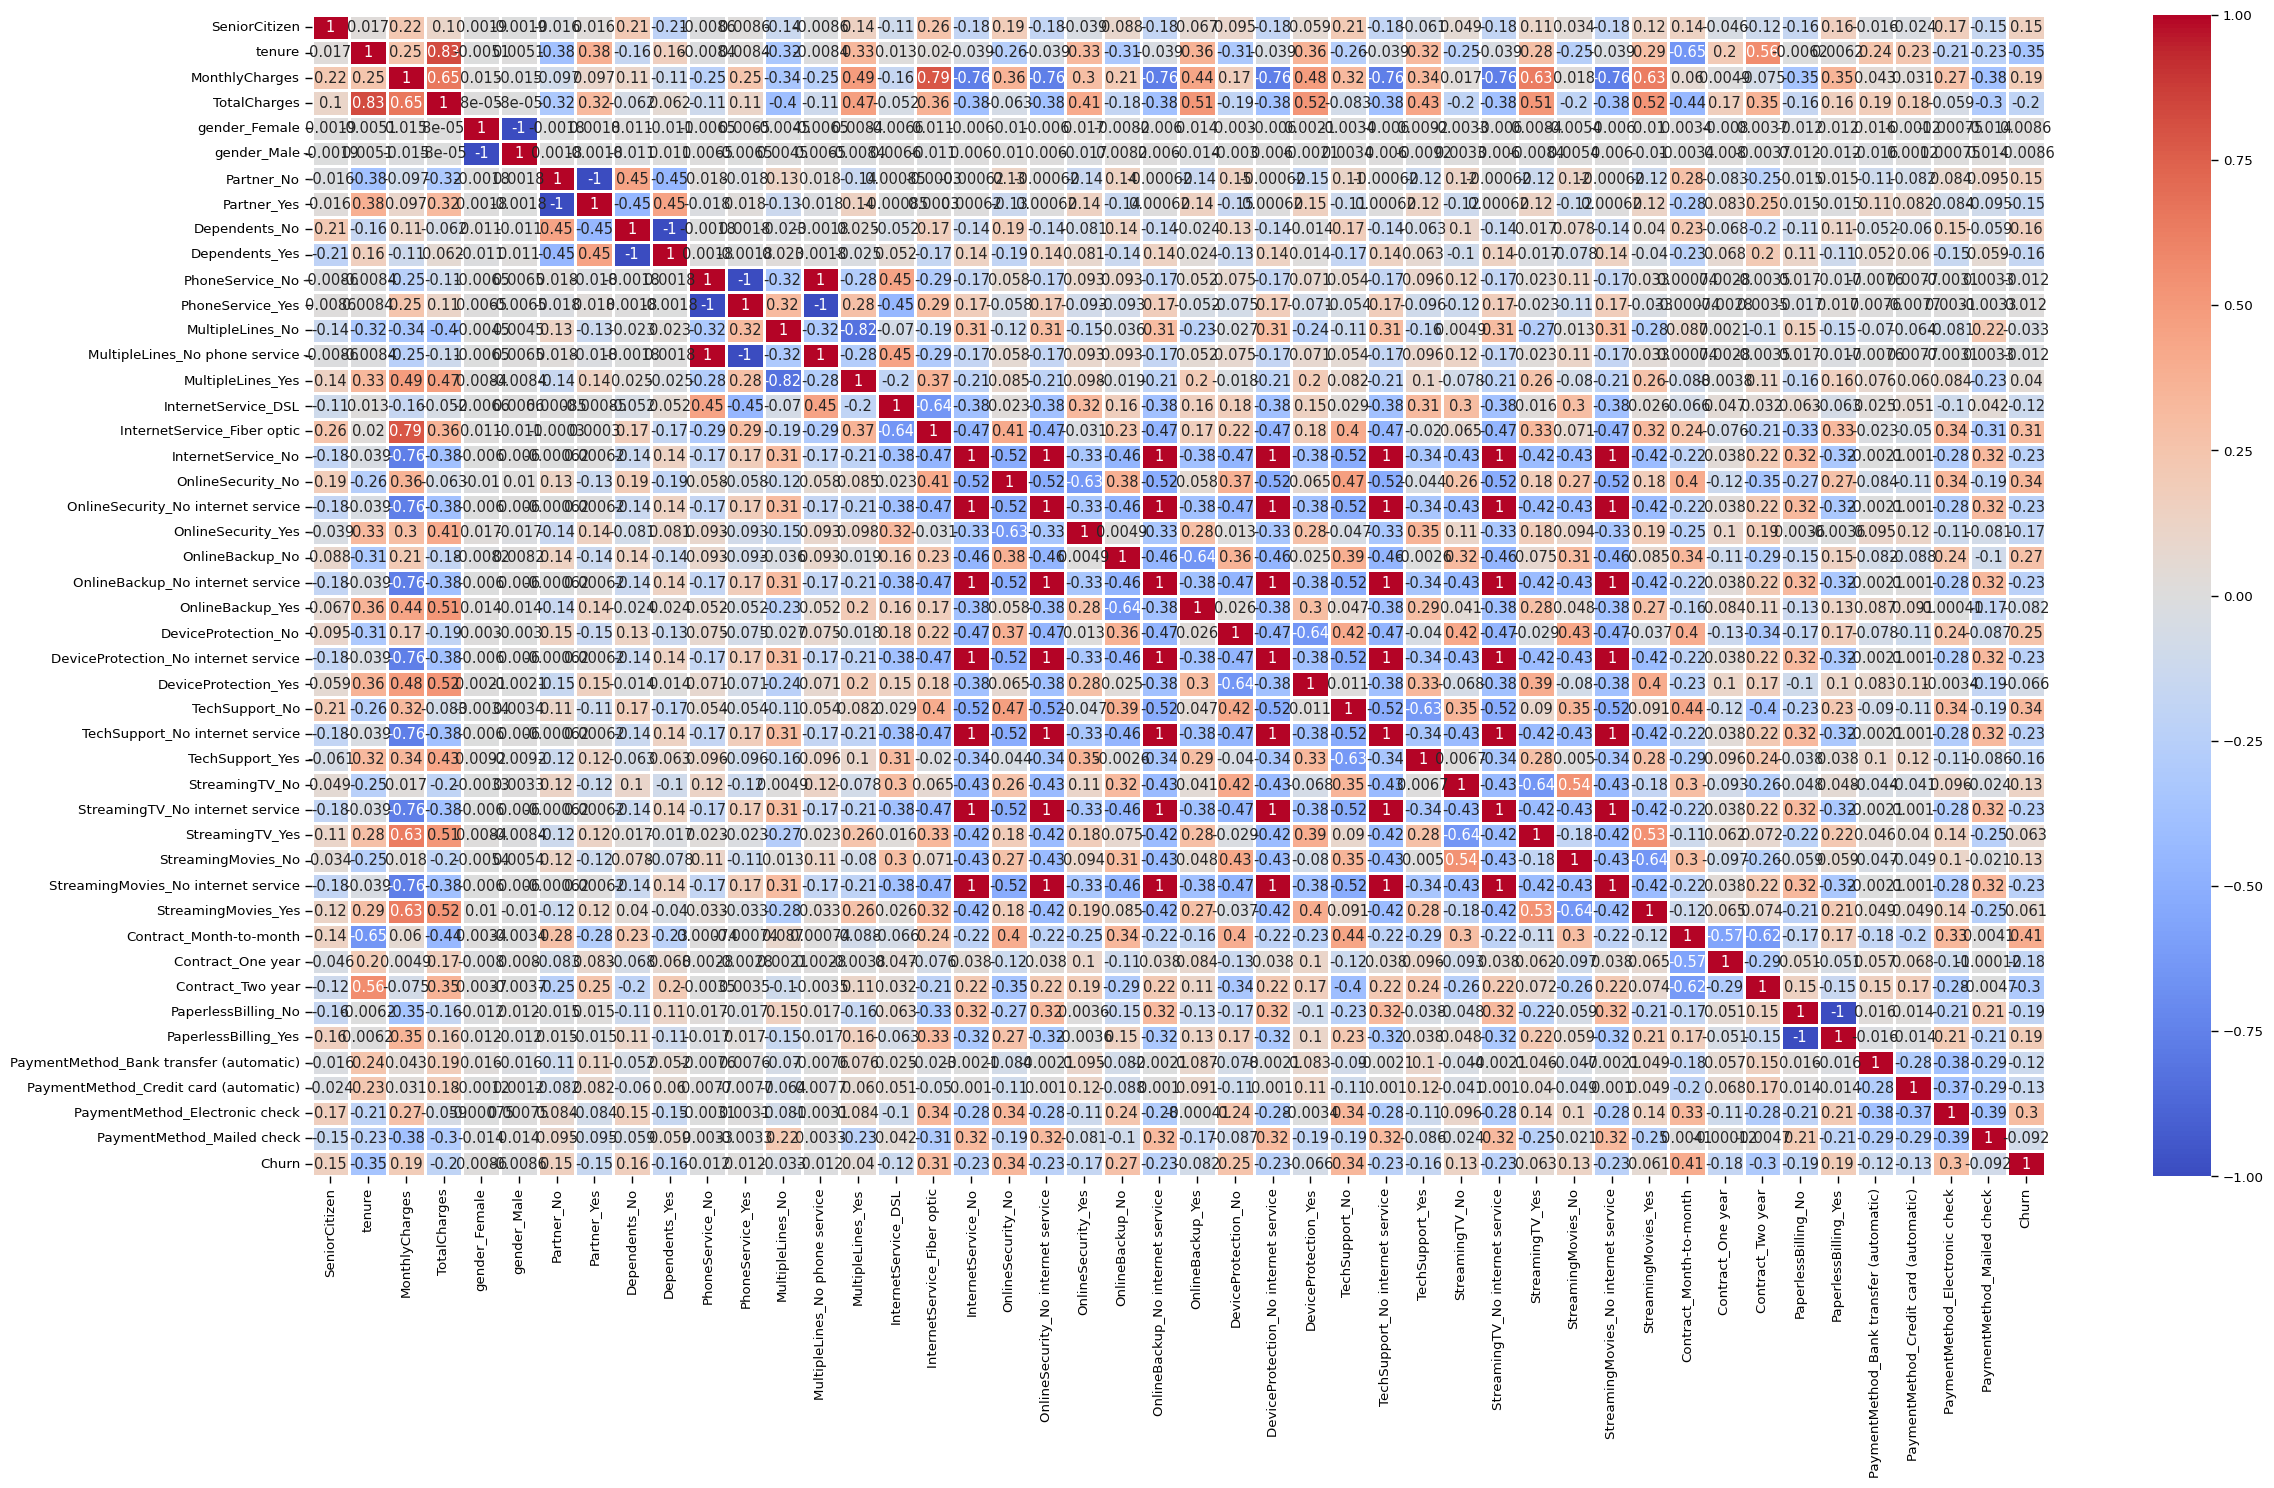

In [274]:
plt.figure(figsize=(25, 15))
sns.heatmap(
    df1.corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=2
)

plt.tight_layout()

plt.show()

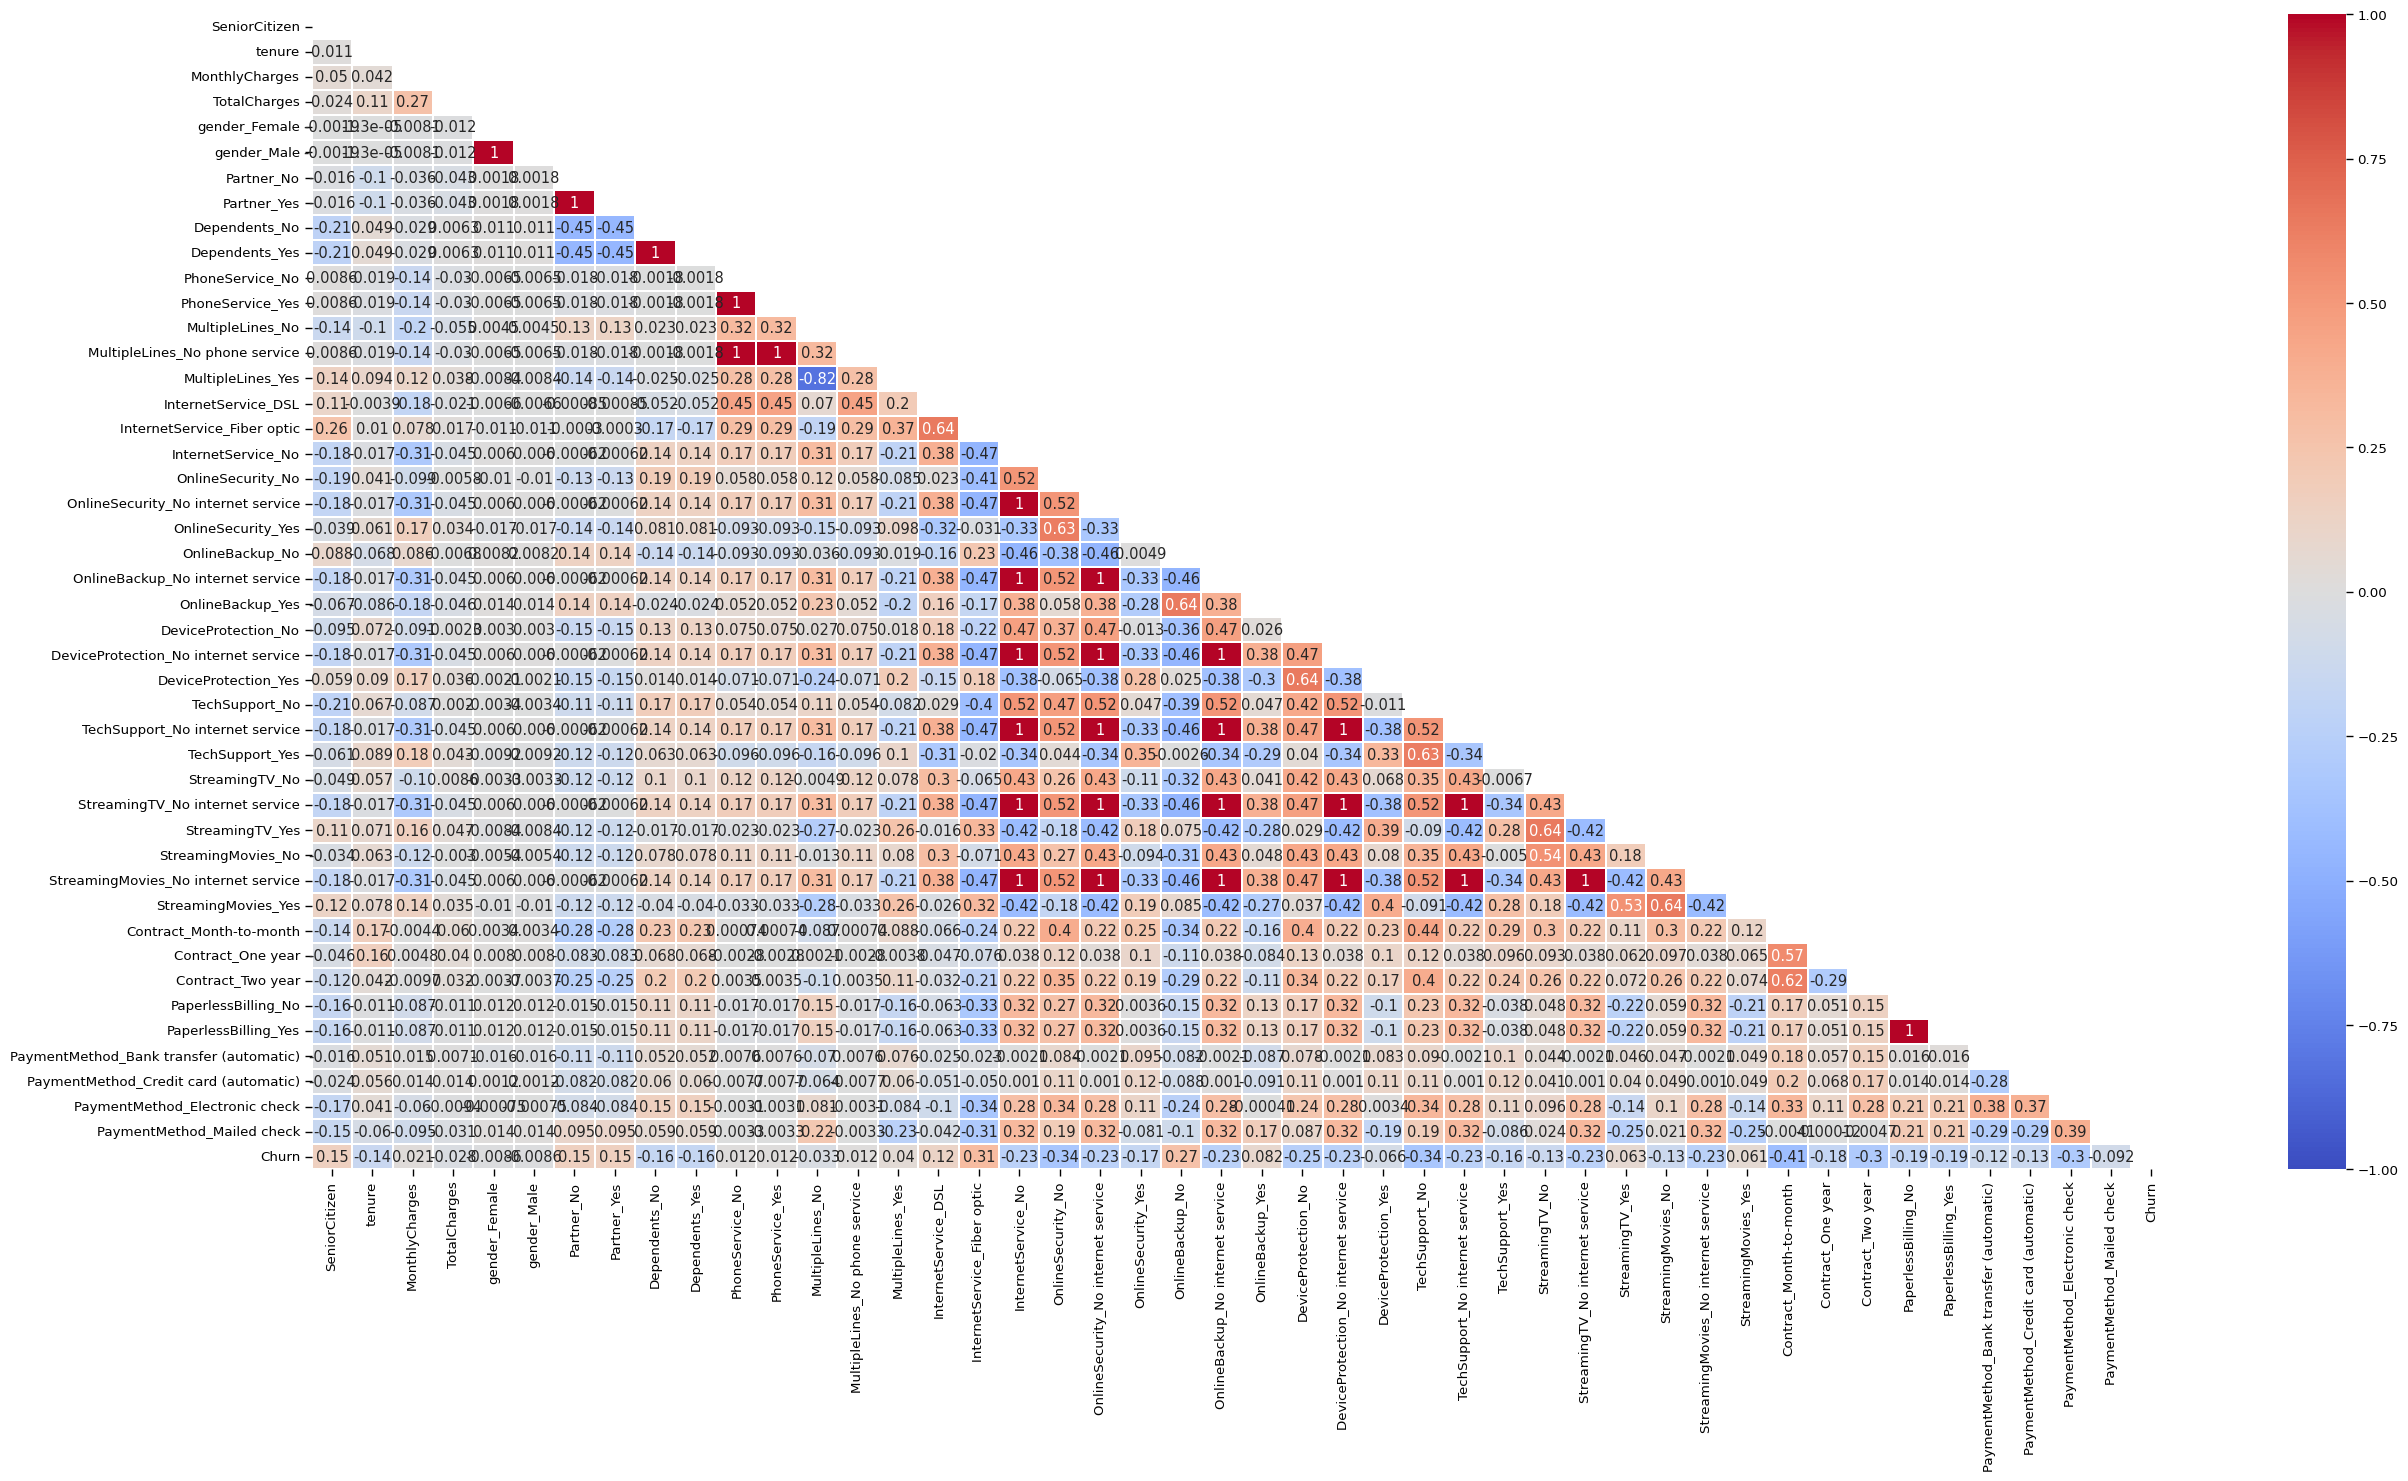

In [275]:
plt.figure(figsize=(30, 15))

corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(
    corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### Bar Plot

In [276]:
def barplot(col_name, y_label, x_label, title):
    colors = ['#4D3425','#E4512B']
    ax = (df[col_name].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True, rot = 0, color = colors)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

    totals = []

    for i in ax.patches:
        totals.append(i.get_width())

    total = sum(totals)

    for i in ax.patches:
        ax.text(
            i.get_x()+.15,
            i.get_height()-3.5,
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold'
            )

CPU times: total: 438 ms
Wall time: 478 ms


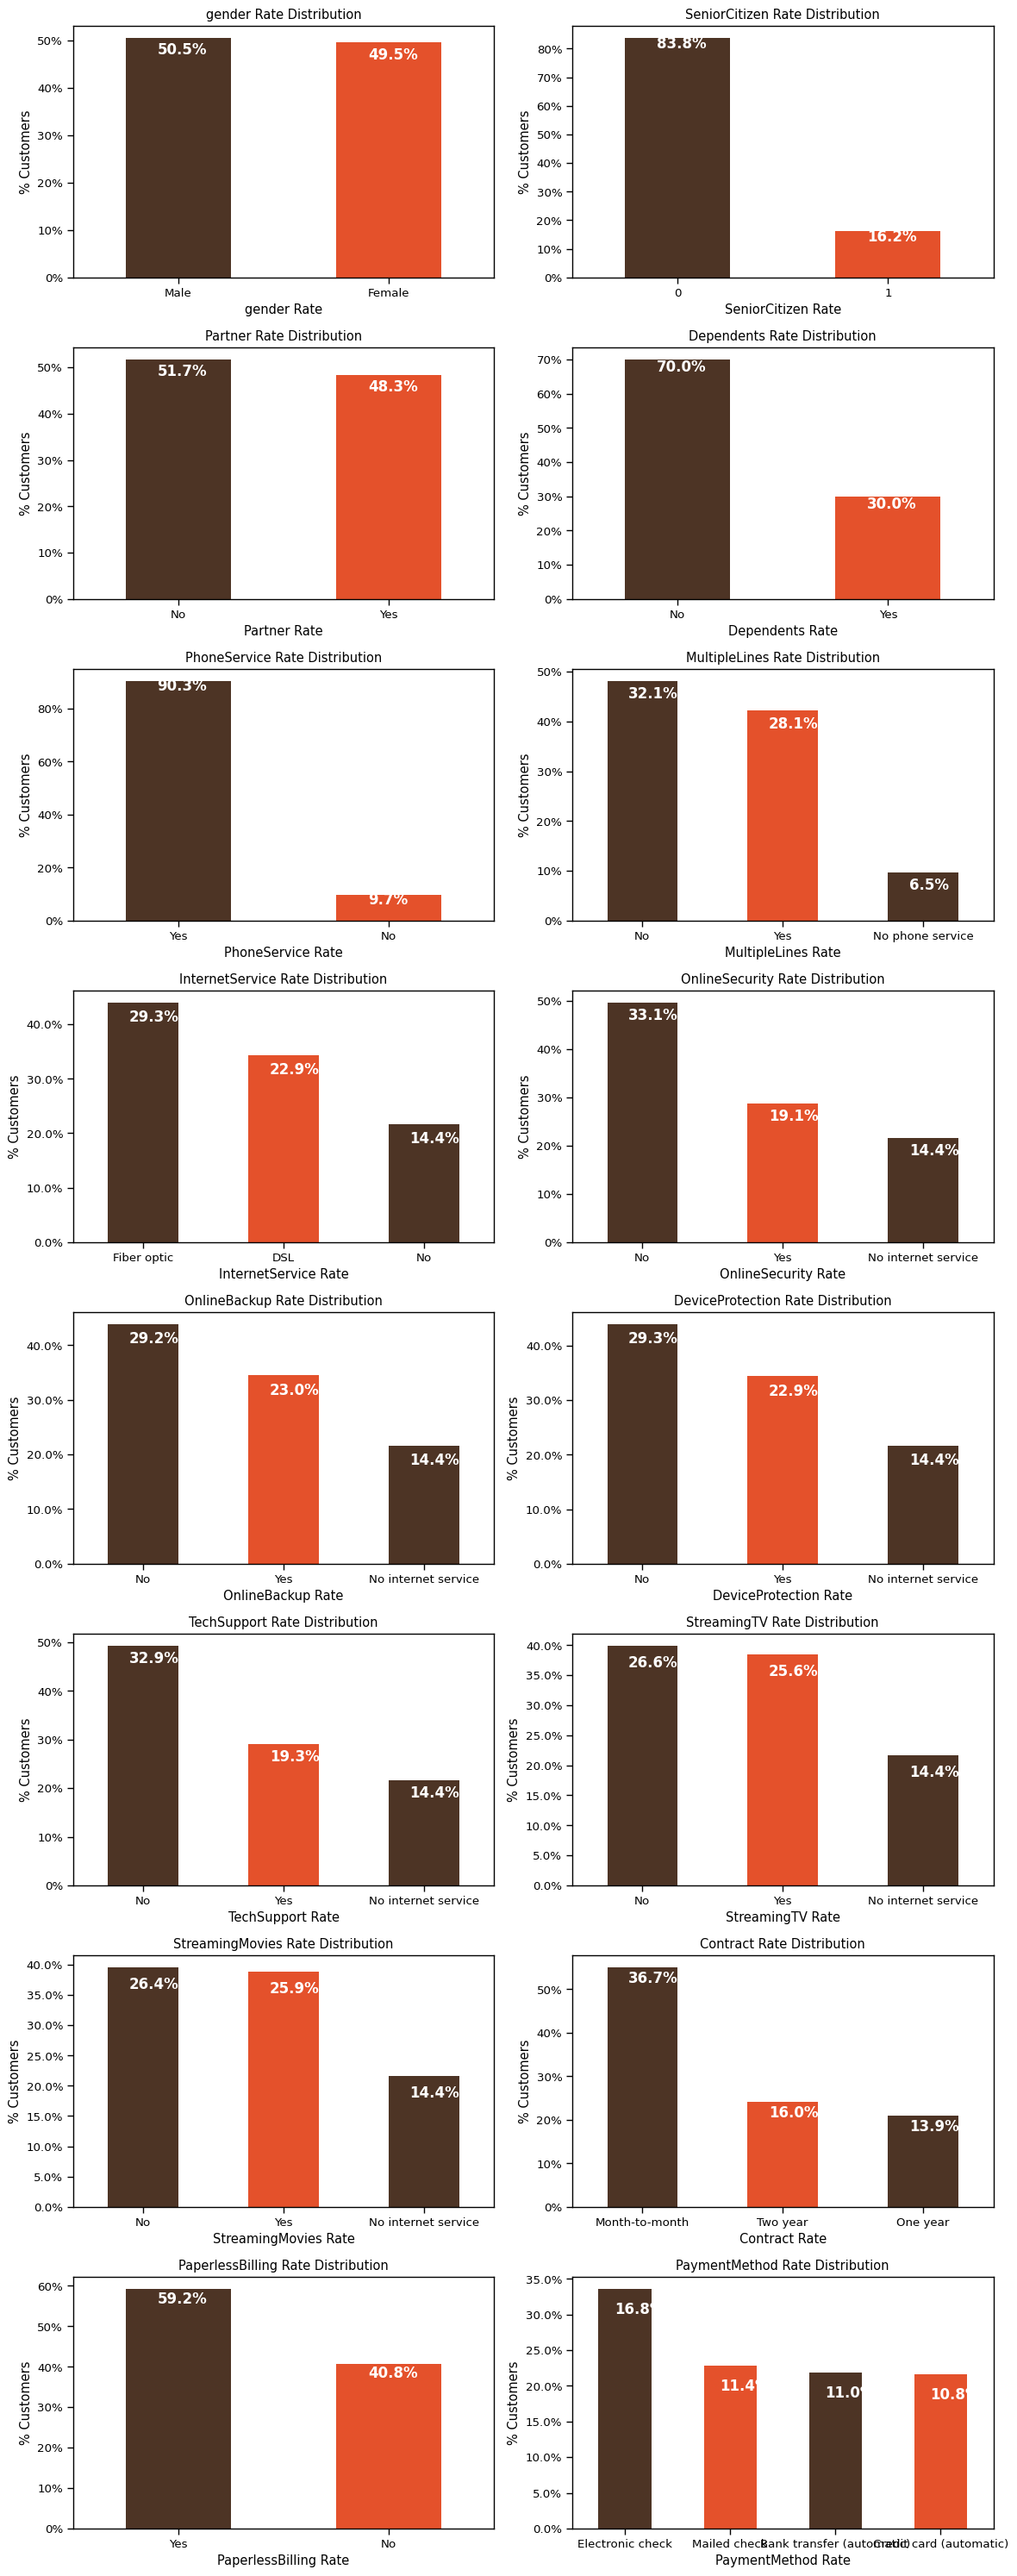

In [277]:
%%time
n_rows = 8
n_cols = 2
plt.figure(figsize=(12, 30))
for i, j in enumerate(col):
    plt.subplot(n_rows, n_cols, i + 1)
    barplot(j, '% Customers', f'{j} Rate', f'{j} Rate Distribution')
plt.tight_layout()

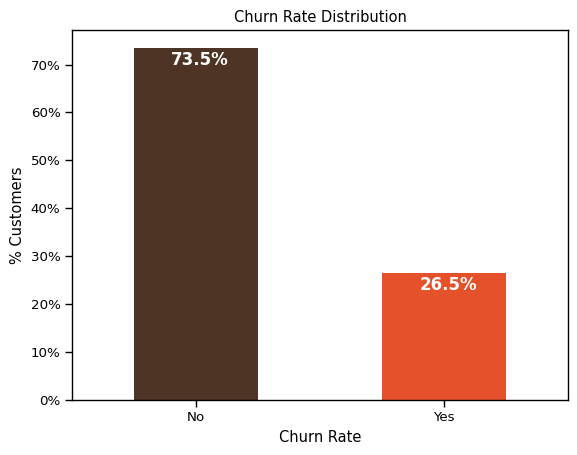

In [278]:
barplot('Churn', '% Customers', f'Churn Rate', f'Churn Rate Distribution')

### Pie Chart

In [92]:
def pie(column, labels, y_label, title, ax=None):

    (df[column].value_counts() * 100.0 / len(df))\
        .plot.pie(autopct='%.1f%%', labels=labels, ax=ax, fontsize=12)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(title, fontsize=12)

In [102]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

CPU times: total: 188 ms
Wall time: 362 ms


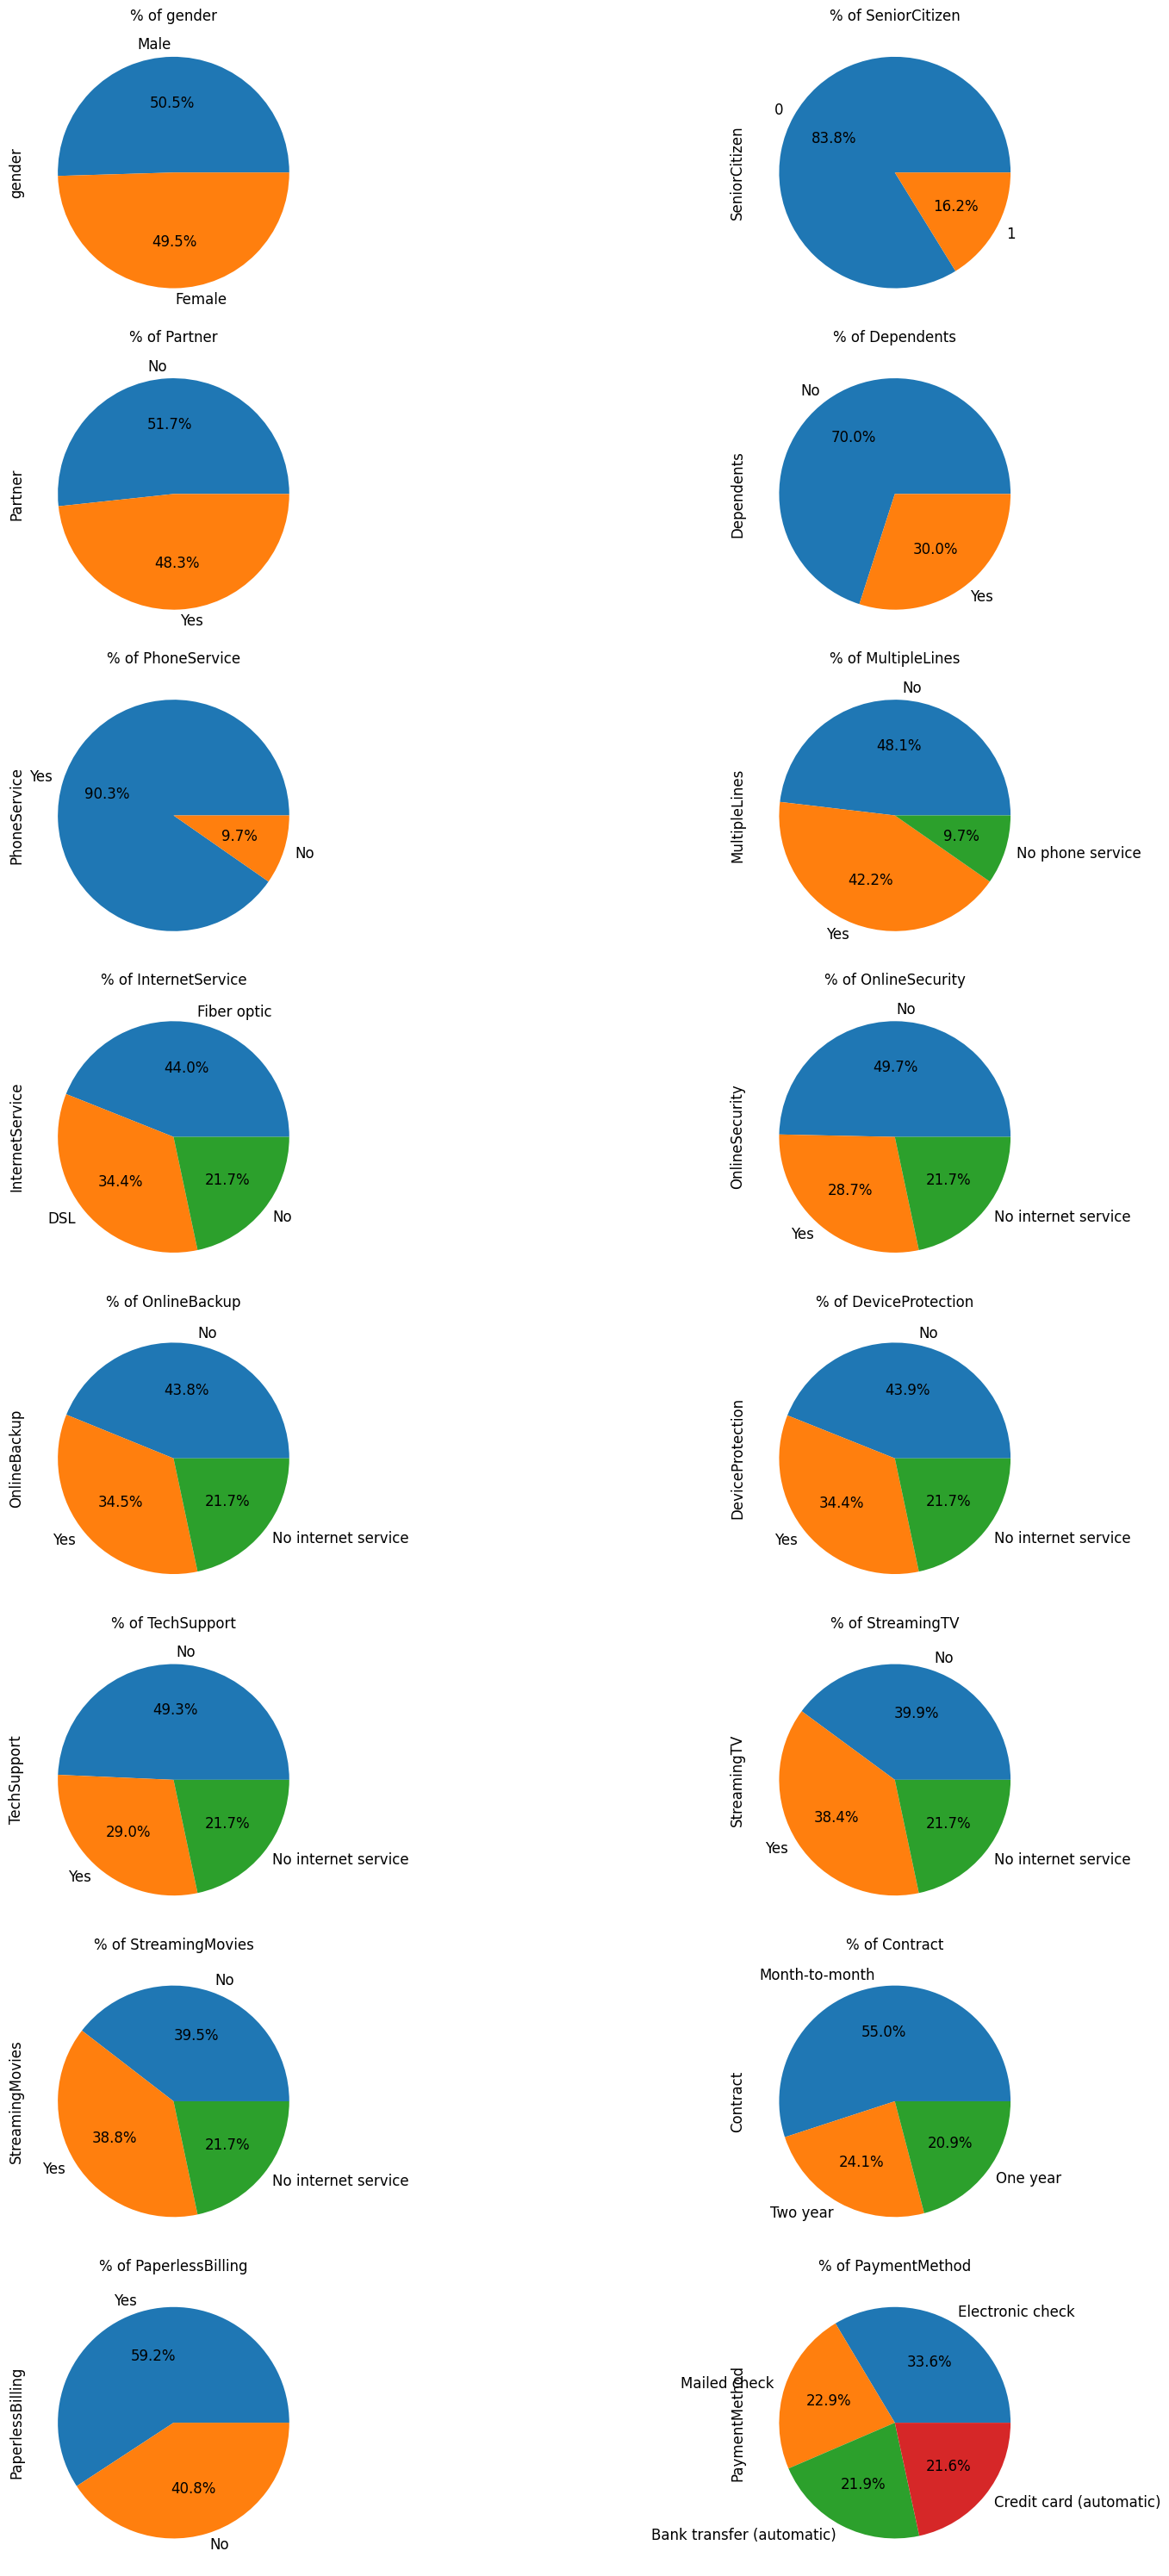

In [104]:
%%time
n_rows = 8
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 30))

for i, j in enumerate(col):
    r, c = divmod(i, n_cols)
    pie(j, list((df[j].value_counts()).index), f'{j}', f'% of {j}', axs[r, c])

plt.tight_layout()

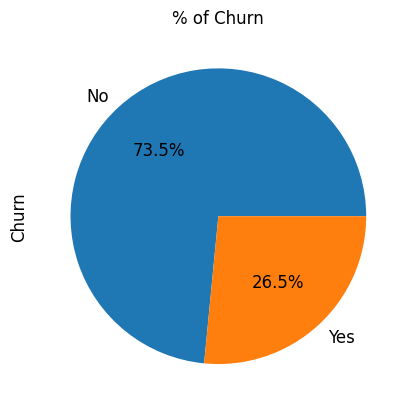

In [105]:
fig, axs = plt.subplots(1, 1)
pie('Churn', list((df['Churn'].value_counts()).index), "Churn", '% of Churn', axs)

# Data Splitting

In [353]:
x_train, x_test, y_train, y_test = train_test_split(x1,
                                                    y,
                                                    stratify=y.Churn,
                                                    test_size=0.1,
                                                    random_state=42
                                                   )

x_train_20, x_test_20, y_train_20, y_test_20 = train_test_split(x1,
                                                    y,
                                                    stratify=y.Churn,
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

In [366]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss1 = StandardScaler()

In [362]:
numeric_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

In [367]:
x_train[numeric_cols] = ss.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = ss.transform(x_test[numeric_cols])
x_train_20[numeric_cols] = ss1.fit_transform(x_train_20[numeric_cols])
x_test_20[numeric_cols] = ss1.transform(x_test_20[numeric_cols])



In [364]:
x_train.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
5769              0  1.578383        1.467403      2.374851              1   
1834              1 -1.272988       -0.651857     -0.982774              0   
3168              0  0.722972       -1.505862     -0.547283              1   
4205              0 -0.336109        0.459179     -0.188607              1   
6218              0  1.537649       -0.210759      0.810521              1   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
5769            0           0            1              0               1   
1834            1           1            0              1               0   
3168            0           1            0              1               0   
4205            0           0            1              0               1   
6218            0           0            1              0               1   

      ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
5769  ...                    1                        0                  0   
1834  ...                    0                        1                  0   
3168  ...                    0                        0                  1   
4205  ...                    1                        0                  0   
6218  ...                    1                        0                  1   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
5769                  1                    0                     1   
1834                  0                    1                     0   
3168                  0                    0                     1   
4205                  1                    1                     0   
6218                  0                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
5769                                        1   
1834                                        0   
3168                                        0   
4205                                        0   
6218                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
5769                                      0                               0   
1834                                      0                               1   
3168                                      0                               0   
4205                                      1                               0   
6218                                      0                               0   

      PaymentMethod_Mailed check  
5769                           0  
1834                           0  
3168                           1  
4205                           0  
6218                           0  

[5 rows x 45 columns]

# RandomForest

In [368]:
rfc = RandomForestClassifier()
rfc1 = RandomForestClassifier()

In [369]:
rfc.fit(x_train, y_train.Churn)

RandomForestClassifier()

In [370]:
y_pred = rfc.predict(x_test)

In [371]:
def metrics(y_test, y_pred):
    print('Accuracy: ', accuracy_score(y_test.Churn, y_pred))
    print('Precision: ', precision_score(y_test.Churn, y_pred))
    print('Recall: ', recall_score(y_test.Churn, y_pred))
    print('F_Score: ', f1_score(y_test.Churn, y_pred))
    print('Classification Report')
    print(classification_report(y_test.Churn, y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(y_test.Churn, y_pred))

In [372]:
def CM(cm):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='coolwarm',
        linewidths=0.5
    )
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

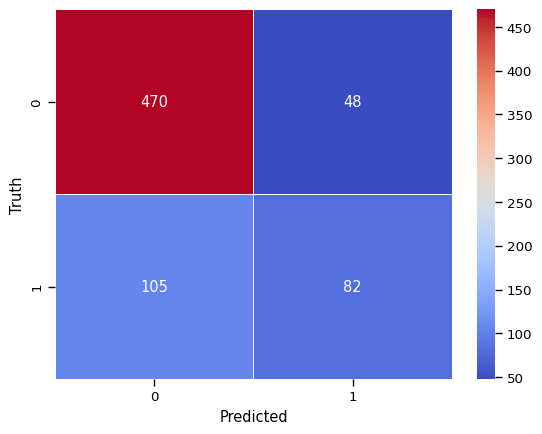

In [373]:
cm = confusion_matrix(y_test.Churn, y_pred)
CM(cm)

In [377]:
metrics(y_test, y_pred)

Accuracy:  0.7829787234042553
Precision:  0.6307692307692307
Recall:  0.4385026737967914
F_Score:  0.5173501577287065
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       518
           1       0.63      0.44      0.52       187

    accuracy                           0.78       705
   macro avg       0.72      0.67      0.69       705
weighted avg       0.77      0.78      0.77       705

Confusion Matrix
[[470  48]
 [105  82]]


In [381]:
len(rfc.feature_importances_), len(x_train.columns.values)

(45, 45)

<Axes: >

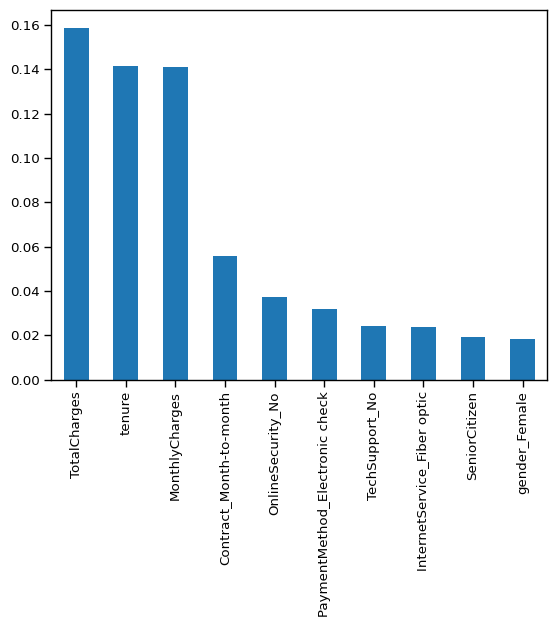

In [392]:
rf_imp = rfc.feature_importances_
rf_weights = pd.Series(
    rf_imp,
    index=x_train.columns.values
)
rf_weights.sort_values(ascending=False)[:10].plot(kind='bar')

In [393]:
rfc1.fit(x_train_20, y_train_20.Churn)

RandomForestClassifier()

In [394]:
y_pred_20 = rfc1.predict(x_test_20)

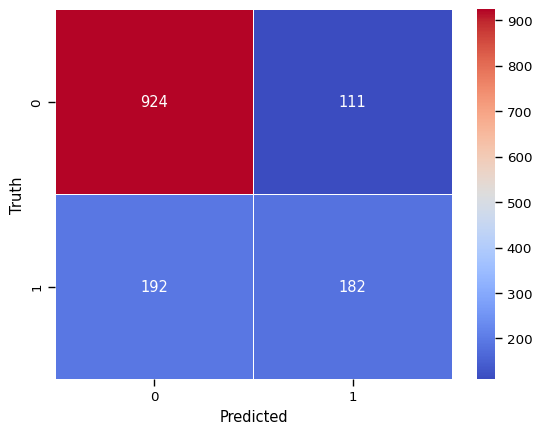

In [395]:
cm = confusion_matrix(y_test_20.Churn, y_pred_20)
CM(cm)

In [396]:
metrics(y_test_20, y_pred_20)

Accuracy:  0.7849538679914834
Precision:  0.621160409556314
Recall:  0.48663101604278075
F_Score:  0.545727136431784
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409

Confusion Matrix
[[924 111]
 [192 182]]


<Axes: >

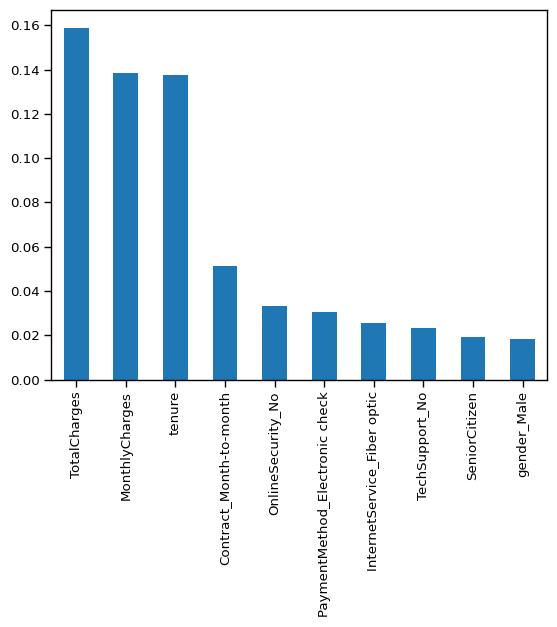

In [397]:
rf_imp_20 = rfc1.feature_importances_
rf1_weights = pd.Series(
    rf_imp_20,
    index=x_train.columns.values
)
rf1_weights.sort_values(ascending=False)[:10].plot(kind='bar')

# XGBoost

In [398]:
xgb = XGBClassifier()
xgb1 = XGBClassifier()

In [399]:
xgb.fit(x_train, y_train.Churn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [400]:
xgb_y_pred = xgb.predict(x_test)

In [401]:
metrics(y_test, xgb_y_pred)

Accuracy:  0.7914893617021277
Precision:  0.6351351351351351
Recall:  0.5026737967914439
F_Score:  0.5611940298507463
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       518
           1       0.64      0.50      0.56       187

    accuracy                           0.79       705
   macro avg       0.73      0.70      0.71       705
weighted avg       0.78      0.79      0.78       705

Confusion Matrix
[[464  54]
 [ 93  94]]


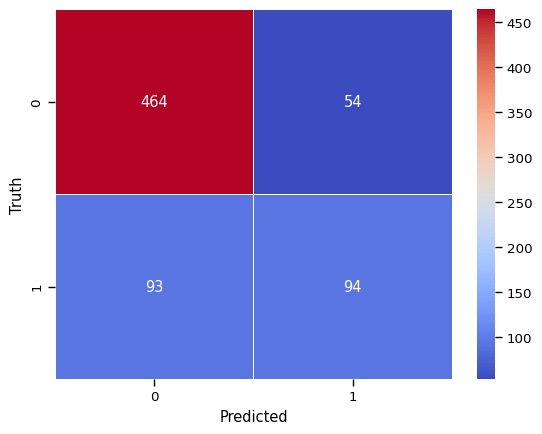

In [402]:
cm = confusion_matrix(y_test.Churn, xgb_y_pred)
CM(cm)

<Axes: >

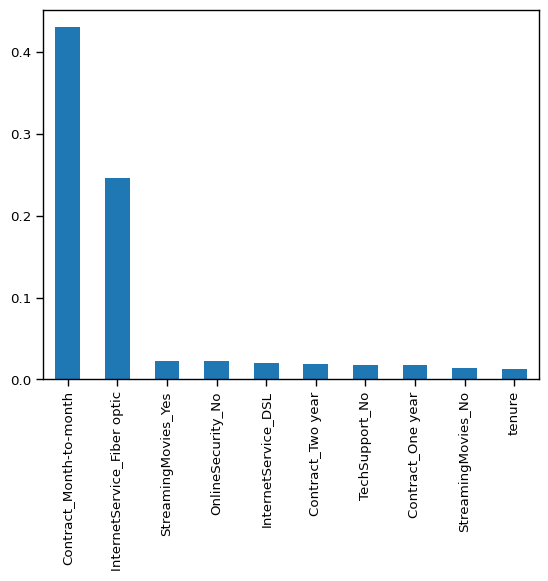

In [403]:
xgb_imp = xgb.feature_importances_
xgb_weights = pd.Series(
    xgb_imp,
    index=x_train.columns.values
)
xgb_weights.sort_values(ascending=False)[:10].plot(kind='bar')

In [404]:
xgb1.fit(x_train_20, y_train_20.Churn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [405]:
xgb_y_pred_20 = xgb1.predict(x_test_20)

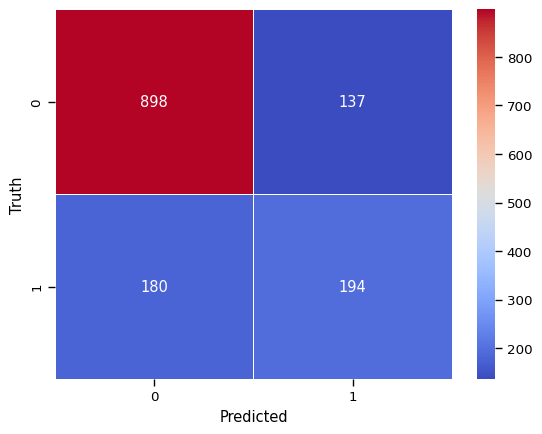

In [406]:
cm = confusion_matrix(y_test_20.Churn, xgb_y_pred_20)
CM(cm)

In [407]:
metrics(y_test_20, xgb_y_pred_20)

Accuracy:  0.7750177430801988
Precision:  0.5861027190332326
Recall:  0.5187165775401069
F_Score:  0.5503546099290779
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.52      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix
[[898 137]
 [180 194]]


<Axes: >

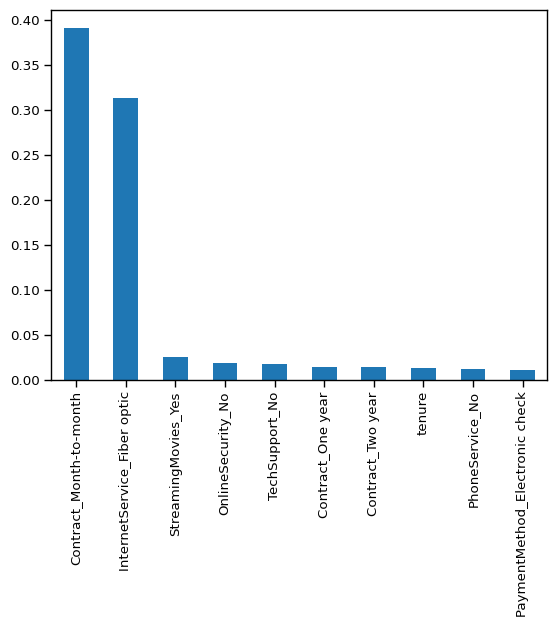

In [408]:
xgb_imp_20 = xgb1.feature_importances_
xgb1_weights = pd.Series(
    xgb_imp_20,
    index=x_train.columns.values
)
xgb1_weights.sort_values(ascending=False)[:10].plot(kind='bar')

# CatBoost

In [409]:
cb = CatBoostClassifier()
cb1 = CatBoostClassifier()

In [410]:
cb.fit(x_train, y_train.Churn)

Learning rate set to 0.022666
0:	learn: 0.6773145	total: 220ms	remaining: 3m 39s
1:	learn: 0.6623435	total: 225ms	remaining: 1m 52s
2:	learn: 0.6483908	total: 230ms	remaining: 1m 16s
3:	learn: 0.6358588	total: 235ms	remaining: 58.6s
4:	learn: 0.6234679	total: 240ms	remaining: 47.8s
5:	learn: 0.6118663	total: 245ms	remaining: 40.6s
6:	learn: 0.6012329	total: 251ms	remaining: 35.5s
7:	learn: 0.5916380	total: 255ms	remaining: 31.6s
8:	learn: 0.5813788	total: 259ms	remaining: 28.6s
9:	learn: 0.5722533	total: 264ms	remaining: 26.1s
10:	learn: 0.5630758	total: 268ms	remaining: 24.1s
11:	learn: 0.5547670	total: 276ms	remaining: 22.7s
12:	learn: 0.5468497	total: 280ms	remaining: 21.3s
13:	learn: 0.5392554	total: 285ms	remaining: 20.1s
14:	learn: 0.5324204	total: 290ms	remaining: 19s
15:	learn: 0.5261858	total: 293ms	remaining: 18s
16:	learn: 0.5203843	total: 298ms	remaining: 17.2s
17:	learn: 0.5146843	total: 302ms	remaining: 16.5s
18:	learn: 0.5097448	total: 306ms	remaining: 15.8s
19:	learn: 0

In [411]:
cb_y_pred = cb.predict(x_test)

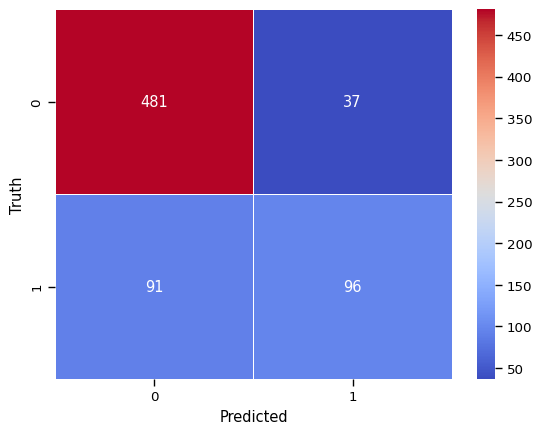

In [412]:
cm = confusion_matrix(y_test.Churn, cb_y_pred)
CM(cm)

In [413]:
metrics(y_test, cb_y_pred)

Accuracy:  0.8184397163120567
Precision:  0.7218045112781954
Recall:  0.5133689839572193
F_Score:  0.6000000000000001
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       518
           1       0.72      0.51      0.60       187

    accuracy                           0.82       705
   macro avg       0.78      0.72      0.74       705
weighted avg       0.81      0.82      0.81       705

Confusion Matrix
[[481  37]
 [ 91  96]]


<Axes: >

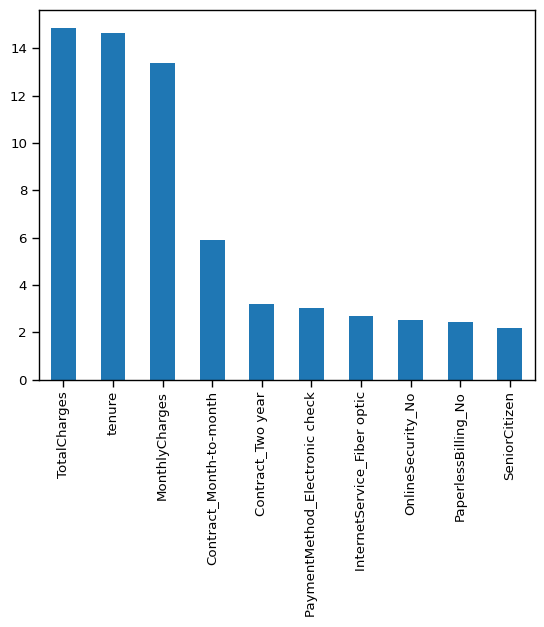

In [414]:
cb_imp = cb.feature_importances_
cb_weights = pd.Series(
    cb_imp,
    index=x_train.columns.values
)
cb_weights.sort_values(ascending=False)[:10].plot(kind='bar')

In [415]:
cb1.fit(x_train_20, y_train_20.Churn)

Learning rate set to 0.021554
0:	learn: 0.6782754	total: 19ms	remaining: 19s
1:	learn: 0.6639552	total: 23.4ms	remaining: 11.7s
2:	learn: 0.6507043	total: 29.3ms	remaining: 9.72s
3:	learn: 0.6387101	total: 36.2ms	remaining: 9.02s
4:	learn: 0.6260045	total: 41.5ms	remaining: 8.27s
5:	learn: 0.6149784	total: 46.1ms	remaining: 7.64s
6:	learn: 0.6046485	total: 50.4ms	remaining: 7.15s
7:	learn: 0.5950583	total: 54.9ms	remaining: 6.8s
8:	learn: 0.5853694	total: 60ms	remaining: 6.6s
9:	learn: 0.5763386	total: 64ms	remaining: 6.33s
10:	learn: 0.5673019	total: 68.7ms	remaining: 6.17s
11:	learn: 0.5592862	total: 72.3ms	remaining: 5.95s
12:	learn: 0.5514531	total: 76.1ms	remaining: 5.78s
13:	learn: 0.5438906	total: 79.7ms	remaining: 5.61s
14:	learn: 0.5370232	total: 83.3ms	remaining: 5.47s
15:	learn: 0.5307216	total: 86.7ms	remaining: 5.33s
16:	learn: 0.5249127	total: 90ms	remaining: 5.2s
17:	learn: 0.5191287	total: 95.1ms	remaining: 5.19s
18:	learn: 0.5141133	total: 99.9ms	remaining: 5.16s
19:	l

In [416]:
cb_y_pred_20 = cb1.predict(x_test_20)

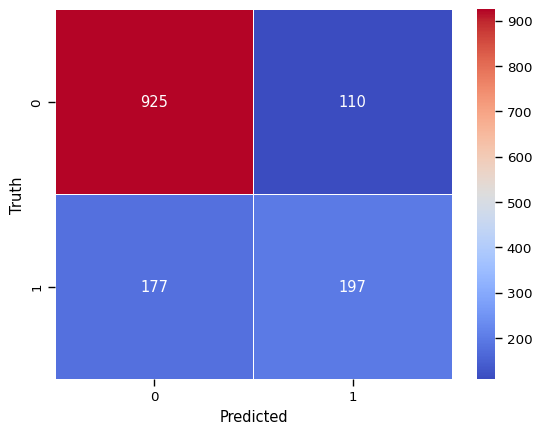

In [417]:
cm = confusion_matrix(y_test_20.Churn, cb_y_pred_20)
CM(cm)

In [418]:
metrics(y_test_20, cb_y_pred_20)

Accuracy:  0.7963094393186657
Precision:  0.6416938110749185
Recall:  0.5267379679144385
F_Score:  0.5785609397944199
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix
[[925 110]
 [177 197]]


<Axes: >

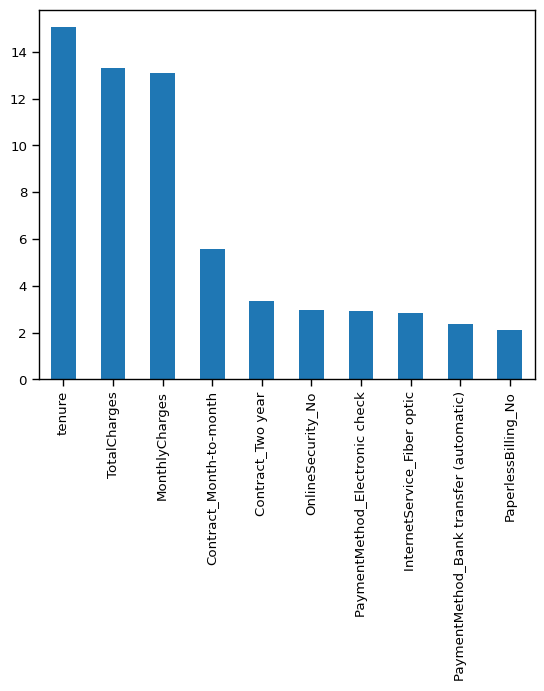

In [419]:
cb1_imp = cb1.feature_importances_
cb1_weights = pd.Series(
    cb1_imp,
    index=x_train.columns.values
)
cb1_weights.sort_values(ascending=False)[:10].plot(kind='bar')

# ANN

In [420]:
import tensorflow as tf

In [421]:
def model_building():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation='relu', input_dim=x_train.shape[1]),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid') 
    ])
    return model
model = model_building()
model1 = model_building()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [422]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2944      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [423]:
x_train1 = x_train.to_numpy()
x_train_20_1 = x_train_20.to_numpy()

In [424]:
x_test1 = x_test.to_numpy()
x_test_20_1 = x_test_20.to_numpy()

In [425]:
y_train1 = y_train.Churn.to_numpy()
y_train_20_1 = y_train_20.Churn.to_numpy()

In [426]:
y_test1 = y_test.Churn.to_numpy()
y_test_20_1 = y_test_20.Churn.to_numpy()

In [427]:
x_train1 = x_train1.astype(np.float32)
y_train1 = y_train1.astype(np.int32)

In [428]:
x_test1 = x_test1.astype(np.float32)
y_test1 = y_test1.astype(np.int32)

In [429]:
x_train_20_1 = x_train_20_1.astype(np.float32)
y_train_20_1 = y_train_20_1.astype(np.int32)

In [430]:
x_test_20_1 = x_test_20_1.astype(np.float32)
y_test_20_1 = y_test_20_1.astype(np.int32)

In [431]:
model.fit(x_train1, y_train1, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10


179/179 [==============================] - 2s 4ms/step - loss: 0.4524 - accuracy: 0.7765 - val_loss: 0.4674 - val_accuracy: 0.7760
Epoch 2/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8035 - val_loss: 0.4669 - val_accuracy: 0.7776
Epoch 3/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8042 - val_loss: 0.4645 - val_accuracy: 0.7823
Epoch 4/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8094 - val_loss: 0.4670 - val_accuracy: 0.7792
Epoch 5/10
179/179 [==============================] - 1s 4ms/step - loss: 0.4045 - accuracy: 0.8135 - val_loss: 0.4610 - val_accuracy: 0.7855
Epoch 6/10
179/179 [==============================] - 1s 4ms/step - loss: 0.4004 - accuracy: 0.8101 - val_loss: 0.4720 - val_accuracy: 0.7744
Epoch 7/10
179/179 [==============================] - 1s 5ms/step - loss: 0.3984 - accuracy: 0.8119 - val_loss: 0.4662 - val_accuracy: 0.7855
Epoc

In [432]:
ann_pred = model.predict(x_test1)

23/23 [==============================] - 0s 3ms/step


In [433]:
ann_preds = [1 if logit >= 0.5 else 0 for logit in ann_pred]

In [434]:
len(ann_preds)

705

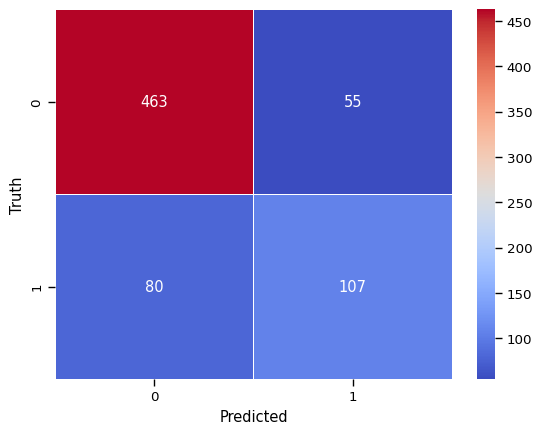

In [435]:
cm = confusion_matrix(y_test.Churn, ann_preds)
CM(cm)

In [436]:
metrics(y_test, ann_preds)

Accuracy:  0.8085106382978723
Precision:  0.6604938271604939
Recall:  0.5721925133689839
F_Score:  0.6131805157593124
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       518
           1       0.66      0.57      0.61       187

    accuracy                           0.81       705
   macro avg       0.76      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705

Confusion Matrix
[[463  55]
 [ 80 107]]


In [437]:
model1.fit(x_train_20_1, y_train_20_1, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
159/159 [==============================] - 4s 8ms/step - loss: 0.4568 - accuracy: 0.7856 - val_loss: 0.4436 - val_accuracy: 0.7819
Epoch 2/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4169 - accuracy: 0.8030 - val_loss: 0.4492 - val_accuracy: 0.7819
Epoch 3/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4115 - accuracy: 0.8034 - val_loss: 0.4478 - val_accuracy: 0.7926
Epoch 4/10
159/159 [==============================] - 1s 6ms/step - loss: 0.4094 - accuracy: 0.8045 - val_loss: 0.4575 - val_accuracy: 0.7677
Epoch 5/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4059 - accuracy: 0.8122 - val_loss: 0.4535 - val_accuracy: 0.7695
Epoch 6/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4023 - accuracy: 0.8085 - val_loss: 0.4461 - val_accuracy: 0.7943
Epoch 7/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4024 - accuracy: 0.8150 - val_loss: 0.4502 - val_accuracy: 0.7855
Epoch 

In [438]:
ann_pred_20 = model.predict(x_test_20_1)

45/45 [==============================] - 0s 4ms/step


In [439]:
ann_preds_20 = [1 if logit >= 0.5 else 0 for logit in ann_pred_20]

In [440]:
metrics(y_test_20, ann_preds_20)

Accuracy:  0.8055358410220014
Precision:  0.638121546961326
Recall:  0.6176470588235294
F_Score:  0.6277173913043478
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1035
           1       0.64      0.62      0.63       374

    accuracy                           0.81      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix
[[904 131]
 [143 231]]


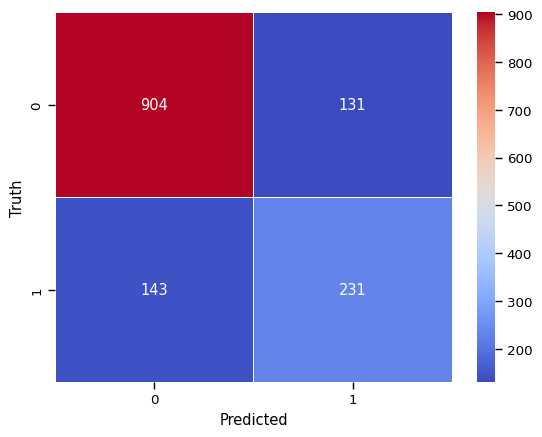

In [441]:
cm = confusion_matrix(y_test_20.Churn, ann_preds_20)
CM(cm)

# Hyperparameter Tuning

## CatBoost